# Data Wrangling; Prisoners Data Set

This section is for cleaning the dataset for prisoner statistics from https://www.icpsr.umich.edu/web/NACJD/studies/37639/versions/V1/datadocumentation into a data frame for prisoner demographics for all U.S. states combined per year. 
    
Data file source:
United States. Bureau of Justice Statistics. National Prisoner Statistics,
[United States], 1978-2018. ICPSR37639-v1. Ann Arbor, MI: Inter-university
Consortium for Political and Social Research [distributor], 2020-07-23.
http://doi.org/10.3886/ICPSR37639.v1
    


In [1]:
# Import needed libraries (for this step and eventual visualizations)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read in raw demographics file.  Contains an observation for each state(51 lines each incl'DC), federal total(1 line), 
# state total (1 line) and combined state and federal (1 line) for 41 years (1978-2018). So 41*54=2214 observations total.
demographics_df = pd.read_csv("37639-0001-Data.tsv", sep="\t")
demographics_df

YEAR  STATEID STATE  REGION  CUSGT1M  CUSGT1F  CUSLT1M  CUSLT1F  \
0     1978        1    AL       3       -2       -2       -2       -2   
1     1978        2    AK       4       -2       -2       -2       -2   
2     1978        4    AZ       4       -2       -2       -2       -2   
3     1978        5    AR       3       -2       -2       -2       -2   
4     1978        6    CA       4       -2       -2       -2       -2   
...    ...      ...   ...     ...      ...      ...      ...      ...   
2209  2018       55    WI       2    20796     1505      532       39   
2210  2018       56    WY       4     1768      285        0        0   
2211  2018       60    ST       7  1011149    79801    13192     3014   
2212  2018       70    US       5  1139093    89976    16081     3521   
2213  2018       99    FE       6   127944    10175     2889      507   

      CUSUNSM  CUSUNSF  ...  DTHHOMOM  DTHHOMOF  DTHPERSM  DTHPERSF  DTHOTHM  \
0          -2       -2  ...        -1        -1         6         0        0   
1          -2       -2  ...        -1        -1         0         0        0   
2          -2       -2  ...        -1        -1         5         0        0   
3          -2       -2  ...        -1        -1         0         0        0   
4          -2       -2  ...        -1        -1         0         0       43   
...       ...      ...  ...       ...       ...       ...       ...      ...   
2209      656       48  ...        -1        -1        -1        -1       -1   
2210        0        0  ...        -1        -1        -1        -1       -1   
2211    11460     1438  ...        -1        -1        -1        -1       -1   
2212    20891     1958  ...        -1        -1        -1        -1       -1   
2213     9431      520  ...        -1        -1        -1        -1       -1   

      DTHOTHF  DTHTOTM  DTHTOTF  HANDLEM  HANDLEF  
0           0       -1       -1       -9       -9  
1           0       -1       -1       -9       -9  
2           0       -1       -1       -9       -9  
3           0       -1       -1       -9       -9  
4           1       -1       -1       -9       -9  
...       ...      ...      ...      ...      ...  
2209       -1       -1       -1       -1       -1  
2210       -1       -1       -1       -1       -1  
2211       -1       -1       -1       -1       -1  
2212       -1       -1       -1       -1       -1  
2213       -1       -1       -1       -1       -1  

[2214 rows x 217 columns]

In [3]:
# Our purposes will only use the total combined state and federal, which is STATEID=70. 
# So should have 41 observations total, one for each year from 1978-2018.
demo_by_year_df = demographics_df[demographics_df["STATEID"]==70]
# display all columns for better verifications of changes as they are made
pd.set_option("display.max_columns", None) 

demo_by_year_df

YEAR  STATEID STATE  REGION  CUSGT1M  CUSGT1F  CUSLT1M  CUSLT1F  \
52    1978       70    US       5       -2       -2       -2       -2   
106   1979       70    US       5       -2       -2       -2       -2   
160   1980       70    US       5       -2       -2       -2       -2   
214   1981       70    US       5       -2       -2       -2       -2   
268   1982       70    US       5       -2       -2       -2       -2   
322   1983       70    US       5   388900    16601    10089     1040   
376   1984       70    US       5   410974    18076     9178     1042   
430   1985       70    US       5   445061    20175    10269     1035   
484   1986       70    US       5   497540    20175    10769     1035   
538   1987       70    US       5   514507    25594     8572     1151   
592   1988       70    US       5   554929    28687     8203     1060   
646   1989       70    US       5   618823    35078    10845     1475   
700   1990       70    US       5   674774    38211    10464     1401   
754   1991       70    US       5   719007    41388    11927     1587   
808   1992       70    US       5   773842    43554    12636     1597   
862   1993       70    US       5   828690    47702    12194     1774   
916   1994       70    US       5   905733    53122    11999     1840   
970   1995       70    US       5   978274    59409    16358     2491   
1024  1996       70    US       5  1019387    64609    18301     3284   
1078  1997       70    US       5  1062492    67615    19634     3793   
1132  1998       70    US       5  1103291    71807    20355     3945   
1186  1999       70    US       5  1110064    72791    21141     4434   
1240  2000       70    US       5  1120521    74073    20154     4169   
1294  2001       70    US       5  1131510    74105    20172     4035   
1348  2002       70    US       5  1161584    78336    20721     4601   
1402  2003       70    US       5  1178537    82111    20571     4563   
1456  2004       70    US       5  1198895    85568    21350     4606   
1510  2005       70    US       5  1215959    86814    21028     4641   
1564  2006       70    US       5  1241907    88684    21704     4652   
1618  2007       70    US       5  1255784    91755    21297     4415   
1672  2008       70    US       5  1262882    91925    20672     4395   
1726  2009       70    US       5  1258912    90874    21330     4203   
1780  2010       70    US       5  1257819    90729    19942     4121   
1834  2011       70    US       5  1234522    88597    23252     4338   
1888  2012       70    US       5  1211064    86178    20596     3983   
1942  2013       70    US       5  1219456    89703    20920     4393   
1996  2014       70    US       5  1213967    91177    17502     3969   
2050  2015       70    US       5  1192288    89180    15621     3755   
2104  2016       70    US       5  1172220    88960    14394     3416   
2158  2017       70    US       5  1160924    89735    15633     3510   
2212  2018       70    US       5  1139093    89976    16081     3521   

      CUSUNSM  CUSUNSF  CUSTOTM  CUSTOTF  CUSGT1T  CUSLT1T  CUSUNST  CUSTOTT  \
52         -2       -2       -2       -2   284149     7040     4861   296050   
106        -2       -2       -2       -2   291610     7903     5076   304589   
160        -2       -2       -2       -2   304692     7991     6915   319598   
214        -2       -2       -2       -2   344283     7741     8005   360029   
268        -2       -2       -2       -2   385343     9966     7605   402914   
322      6645      623   405634    18264       -1       -1       -1       -1   
376      8039      655   428491    19773       -1       -1       -1       -1   
430     10158      895   465488    22105       -1       -1       -1       -1   
484     10132      895   518441    22105       -1       -1       -1       -1   
538     11934     1056   535013    27801       -1       -1       -1       -1   
592     12538     1393   575670    31140       -1       -1 

Note: the demographic data comes from the Bureau of Justice Statistics website (bjs.gov), using the tool:
Corrections Statistical Analysis Tool (CSAT) - Prisoners

From the FAQ section under this tool:

What is the difference between custody and jurisdiction counts?

Between 1926 and 1976, the official measure of the prison population was the number of inmates in the custody of state or federal correctional officials. State and federal reporting officials were instructed to count all prisoners physically housed under their authority, regardless of whether they or some other entity had legal authority over the inmates.

As states and the Federal Bureau of Prisons increased their use of local jails and interstate compacts to house inmates, NPS began asking states to report a count of inmates under the jurisdiction or legal authority of state and federal adult correctional officials in addition to their custody counts.

Since 1977, the jurisdiction count has been the preferred measure of the prison population. This count includes all state and federal inmates held in the physical custody of public or private prisons, inmates held in jail facilities located either inside or outside of the state of legal responsibility, and other inmates who may be temporarily out to court or in transit from the jurisdiction of legal authority to the custody of a confinement facility outside that jurisdiction.

In [4]:
# Given the statement from the Bureau of Justice Statistics website that "Since 1977, the jurisdiction count has been the
# preferred measure of the prison population.": drop 16 columns from demo_by_year_df related only to custody.
demo_by_year_df = demo_by_year_df.drop(demo_by_year_df.iloc[:, 4:20], axis = 1)
demo_by_year_df

YEAR  STATEID STATE  REGION  JURGT1M  JURGT1F  JURLT1M  JURLT1F  \
52    1978       70    US       5   282813    11583     7737      687   
106   1979       70    US       5   289465    12005     7705      659   
160   1980       70    US       5   303633    12331     8489      639   
214   1981       70    US       5   339375    14298     8209      751   
268   1982       70    US       5   379075    16441    10027      858   
322   1983       70    US       5   401870    17476     9827      979   
376   1984       70    US       5   424193    19205     9339      985   
430   1985       70    US       5   459223    21345    10294      966   
484   1986       70    US       5   497540    24544    10769     1126   
538   1987       70    US       5   533990    26822    10761     1323   
592   1988       70    US       5   573587    30145     9616     1182   
646   1989       70    US       5   643643    37264    13134     1854   
700   1990       70    US       5   699416    40564    14125     1870   
754   1991       70    US       5   745810    43802    14936     1943   
808   1992       70    US       5   799776    46501    14522     1871   
862   1993       70    US       5   878037    54037    14569     2134   
916   1994       70    US       5   956566    60125    13765     2067   
970   1995       70    US       5  1021059    63963    14590     2081   
1024  1996       70    US       5  1068123    69599    17300     2750   
1078  1997       70    US       5  1120544    73790    18398     2882   
1132  1998       70    US       5  1177243    79231    21700     3186   
1186  1999       70    US       5  1221712    82369    26944     5447   
1240  2000       70    US       5  1249130    85044    25483     5626   
1294  2001       70    US       5  1260033    85184    25726     5400   
1348  2002       70    US       5  1291450    89066    26619     6071   
1402  2003       70    US       5  1315790    92571    25151     5761   
1456  2004       70    US       5  1337730    95998    26586     5974   
1510  2005       70    US       5  1364178    98688    26733     6109   
1564  2006       70    US       5  1401261   103337    27623     5920   
1618  2007       70    US       5  1427088   105763    27794     5781   
1672  2008       70    US       5  1441384   106358    27396     5778   
1726  2009       70    US       5  1448239   105335    28760     5736   
1780  2010       70    US       5  1447766   104903    26787     5575   
1834  2011       70    US       5  1435141   103706    27507     5331   
1888  2012       70    US       5  1411076   101354    25996     5020   
1942  2013       70    US       5  1416102   104301    33387     5920   
1996  2014       70    US       5  1401685   106096    25067     4659   
2050  2015       70    US       5  1371879   104968    21861     4350   
2104  2016       70    US       5  1354109   105839    19872     3925   
2158  2017       70    US       5  1334828   105049    21132     4317   
2212  2018       70    US       5  1309925   104237    22400     4546   

      JURUNSM  JURUNSF  JURTOTM  JURTOTF  PVINM  PVINF  PVOTHM  PVOTHF  \
52       3980      476   294530    12746     -1     -1      -1      -1   
106      4292      331   301462    12995     -1     -1      -1      -1   
160      4269      450   316401    13420     -1     -1      -1      -1   
214      6809      488   354393    15537     -1     -1      -1      -1   
268      6919      486   396021    17785     -1     -1      -1      -1   
322      6138      565   417835    19020     -1     -1      -1      -1   
376      7676      604   441208    20794     -1     -1      -1      -1   
430      9842      837   479359    23148     -1     -1      -1      -1   
484     10132      861   518441    26531     -1     -1      -1      -1   
538     11210      978   555961    29123     -1     -1      -1      -1   
592     11793     1277   594996    32604     -1     -1      -1      -1   
646     14975     1512   671752    40612     -1    

In [5]:
# Add new field: Total number of prisoners under US (combined state and fed) jurisdiction as of the end of the year
demo_by_year_df['JURUSTOTAL'] = demo_by_year_df['JURTOTM'] + demo_by_year_df['JURTOTF']
demo_by_year_df

YEAR  STATEID STATE  REGION  JURGT1M  JURGT1F  JURLT1M  JURLT1F  \
52    1978       70    US       5   282813    11583     7737      687   
106   1979       70    US       5   289465    12005     7705      659   
160   1980       70    US       5   303633    12331     8489      639   
214   1981       70    US       5   339375    14298     8209      751   
268   1982       70    US       5   379075    16441    10027      858   
322   1983       70    US       5   401870    17476     9827      979   
376   1984       70    US       5   424193    19205     9339      985   
430   1985       70    US       5   459223    21345    10294      966   
484   1986       70    US       5   497540    24544    10769     1126   
538   1987       70    US       5   533990    26822    10761     1323   
592   1988       70    US       5   573587    30145     9616     1182   
646   1989       70    US       5   643643    37264    13134     1854   
700   1990       70    US       5   699416    40564    14125     1870   
754   1991       70    US       5   745810    43802    14936     1943   
808   1992       70    US       5   799776    46501    14522     1871   
862   1993       70    US       5   878037    54037    14569     2134   
916   1994       70    US       5   956566    60125    13765     2067   
970   1995       70    US       5  1021059    63963    14590     2081   
1024  1996       70    US       5  1068123    69599    17300     2750   
1078  1997       70    US       5  1120544    73790    18398     2882   
1132  1998       70    US       5  1177243    79231    21700     3186   
1186  1999       70    US       5  1221712    82369    26944     5447   
1240  2000       70    US       5  1249130    85044    25483     5626   
1294  2001       70    US       5  1260033    85184    25726     5400   
1348  2002       70    US       5  1291450    89066    26619     6071   
1402  2003       70    US       5  1315790    92571    25151     5761   
1456  2004       70    US       5  1337730    95998    26586     5974   
1510  2005       70    US       5  1364178    98688    26733     6109   
1564  2006       70    US       5  1401261   103337    27623     5920   
1618  2007       70    US       5  1427088   105763    27794     5781   
1672  2008       70    US       5  1441384   106358    27396     5778   
1726  2009       70    US       5  1448239   105335    28760     5736   
1780  2010       70    US       5  1447766   104903    26787     5575   
1834  2011       70    US       5  1435141   103706    27507     5331   
1888  2012       70    US       5  1411076   101354    25996     5020   
1942  2013       70    US       5  1416102   104301    33387     5920   
1996  2014       70    US       5  1401685   106096    25067     4659   
2050  2015       70    US       5  1371879   104968    21861     4350   
2104  2016       70    US       5  1354109   105839    19872     3925   
2158  2017       70    US       5  1334828   105049    21132     4317   
2212  2018       70    US       5  1309925   104237    22400     4546   

      JURUNSM  JURUNSF  JURTOTM  JURTOTF  PVINM  PVINF  PVOTHM  PVOTHF  \
52       3980      476   294530    12746     -1     -1      -1      -1   
106      4292      331   301462    12995     -1     -1      -1      -1   
160      4269      450   316401    13420     -1     -1      -1      -1   
214      6809      488   354393    15537     -1     -1      -1      -1   
268      6919      486   396021    17785     -1     -1      -1      -1   
322      6138      565   417835    19020     -1     -1      -1      -1   
376      7676      604   441208    20794     -1     -1      -1      -1   
430      9842      837   479359    23148     -1     -1      -1      -1   
484     10132      861   518441    26531     -1     -1      -1      -1   
538     11210      978   555961    29123     -1     -1      -1      -1   
592     11793     1277   594996    32604     -1     -1      -1      -1   
646     14975     1512   671752    40612     -1    

In [6]:
# Move new column to the right of the two columns whose sum it contains
# pop column,JURUSTOTAL
move_column = demo_by_year_df.pop('JURUSTOTAL')
  
# insert column using insert(position,column_name, move_column) function
demo_by_year_df.insert(12, 'JURUSTOTAL', move_column)
demo_by_year_df.head(15)

YEAR  STATEID STATE  REGION  JURGT1M  JURGT1F  JURLT1M  JURLT1F  JURUNSM  \
52   1978       70    US       5   282813    11583     7737      687     3980   
106  1979       70    US       5   289465    12005     7705      659     4292   
160  1980       70    US       5   303633    12331     8489      639     4269   
214  1981       70    US       5   339375    14298     8209      751     6809   
268  1982       70    US       5   379075    16441    10027      858     6919   
322  1983       70    US       5   401870    17476     9827      979     6138   
376  1984       70    US       5   424193    19205     9339      985     7676   
430  1985       70    US       5   459223    21345    10294      966     9842   
484  1986       70    US       5   497540    24544    10769     1126    10132   
538  1987       70    US       5   533990    26822    10761     1323    11210   
592  1988       70    US       5   573587    30145     9616     1182    11793   
646  1989       70    US       5   643643    37264    13134     1854    14975   
700  1990       70    US       5   699416    40564    14125     1870    16299   
754  1991       70    US       5   745810    43802    14936     1943    17164   
808  1992       70    US       5   799776    46501    14522     1871    17795   

     JURUNSF  JURTOTM  JURTOTF  JURUSTOTAL  PVINM  PVINF  PVOTHM  PVOTHF  \
52       476   294530    12746      307276     -1     -1      -1      -1   
106      331   301462    12995      314457     -1     -1      -1      -1   
160      450   316401    13420      329821     -1     -1      -1      -1   
214      488   354393    15537      369930     -1     -1      -1      -1   
268      486   396021    17785      413806     -1     -1      -1      -1   
322      565   417835    19020      436855     -1     -1      -1      -1   
376      604   441208    20794      462002     -1     -1      -1      -1   
430      837   479359    23148      502507     -1     -1      -1      -1   
484      861   518441    26531      544972     -1     -1      -1      -1   
538      978   555961    29123      585084     -1     -1      -1      -1   
592     1277   594996    32604      627600     -1     -1      -1      -1   
646     1512   671752    40612      712364     -1     -1      -1      -1   
700     1645   729840    44079      773919     -1     -1      -1      -1   
754     1906   777908    47651      825559     -1     -1      -1      -1   
808     2035   832093    50407      882500     -1     -1      -1      -1   

     PVINCLM  PVINCLF  LFM  LFF  LFINCLM  LFINCLF  LFCROWDM  LFCROWDF  \
52        -8       -8   -1   -1       -8       -8      6618       156   
106       -8       -8   -1   -1       -8       -8      6318       179   
160       -8       -8   -1   -1       -8       -8      6229       131   
214       -8       -8   -1   -1       -8       -8      6693       207   
268       -8       -8   -1   -1       -8       -8      8350       339   
322       -8       -8   -1   -1       -8       -8      8692       442   
376       -8       -8   -1   -1       -8       -8     10872       622   
430       -8       -8   -1   -1       -8       -8      9714       576   
484       -8       -8   -1   -1       -8       -8     11423       609   
538       -8       -8   -1   -1       -8       -8     11778       583   
592       -8       -8   -1   -1       -8       -8     13543       665   
646       -8       -8   -1   -1       -8       -8     16171       982   
700       -8       -8   -1   -1       -8       -8     15588      1160   
754       -8       -8   -1   -1       -8       -8     17146      1158   
808       -8       -8   -1   -1       -8       -8     17009      1419   

     LFCRSTM  LFCRSTF  LFCRINCM  LFCRINCF  FEDM  FEDF  OTHSTM  OTHSTF  \
52        -1       -1        -8        -8    -1    -1      -1      -1   
106       -1       -1        -8        -8    -1    -1      -1      -1   
160       -1       -1        -8        -8    -1    -1      -1      -1   
214       -1       -1        -

In [7]:
# Add two new fields: 
#Total number of prisoners under US (combined state and fed) jurisdiction admitted during the year
demo_by_year_df['ADMITUSTOTAL'] = demo_by_year_df['ADTOTM'] + demo_by_year_df['ADTOTF']
#Total number of prisoners under US (combined state and fed) jurisdiction released during the year
demo_by_year_df['RELEASEUSTOTAL'] = demo_by_year_df['RLTOTM'] + demo_by_year_df['RLTOTF']
demo_by_year_df

YEAR  STATEID STATE  REGION  JURGT1M  JURGT1F  JURLT1M  JURLT1F  \
52    1978       70    US       5   282813    11583     7737      687   
106   1979       70    US       5   289465    12005     7705      659   
160   1980       70    US       5   303633    12331     8489      639   
214   1981       70    US       5   339375    14298     8209      751   
268   1982       70    US       5   379075    16441    10027      858   
322   1983       70    US       5   401870    17476     9827      979   
376   1984       70    US       5   424193    19205     9339      985   
430   1985       70    US       5   459223    21345    10294      966   
484   1986       70    US       5   497540    24544    10769     1126   
538   1987       70    US       5   533990    26822    10761     1323   
592   1988       70    US       5   573587    30145     9616     1182   
646   1989       70    US       5   643643    37264    13134     1854   
700   1990       70    US       5   699416    40564    14125     1870   
754   1991       70    US       5   745810    43802    14936     1943   
808   1992       70    US       5   799776    46501    14522     1871   
862   1993       70    US       5   878037    54037    14569     2134   
916   1994       70    US       5   956566    60125    13765     2067   
970   1995       70    US       5  1021059    63963    14590     2081   
1024  1996       70    US       5  1068123    69599    17300     2750   
1078  1997       70    US       5  1120544    73790    18398     2882   
1132  1998       70    US       5  1177243    79231    21700     3186   
1186  1999       70    US       5  1221712    82369    26944     5447   
1240  2000       70    US       5  1249130    85044    25483     5626   
1294  2001       70    US       5  1260033    85184    25726     5400   
1348  2002       70    US       5  1291450    89066    26619     6071   
1402  2003       70    US       5  1315790    92571    25151     5761   
1456  2004       70    US       5  1337730    95998    26586     5974   
1510  2005       70    US       5  1364178    98688    26733     6109   
1564  2006       70    US       5  1401261   103337    27623     5920   
1618  2007       70    US       5  1427088   105763    27794     5781   
1672  2008       70    US       5  1441384   106358    27396     5778   
1726  2009       70    US       5  1448239   105335    28760     5736   
1780  2010       70    US       5  1447766   104903    26787     5575   
1834  2011       70    US       5  1435141   103706    27507     5331   
1888  2012       70    US       5  1411076   101354    25996     5020   
1942  2013       70    US       5  1416102   104301    33387     5920   
1996  2014       70    US       5  1401685   106096    25067     4659   
2050  2015       70    US       5  1371879   104968    21861     4350   
2104  2016       70    US       5  1354109   105839    19872     3925   
2158  2017       70    US       5  1334828   105049    21132     4317   
2212  2018       70    US       5  1309925   104237    22400     4546   

      JURUNSM  JURUNSF  JURTOTM  JURTOTF  JURUSTOTAL  PVINM  PVINF  PVOTHM  \
52       3980      476   294530    12746      307276     -1     -1      -1   
106      4292      331   301462    12995      314457     -1     -1      -1   
160      4269      450   316401    13420      329821     -1     -1      -1   
214      6809      488   354393    15537      369930     -1     -1      -1   
268      6919      486   396021    17785      413806     -1     -1      -1   
322      6138      565   417835    19020      436855     -1     -1      -1   
376      7676      604   441208    20794      462002     -1     -1      -1   
430      9842      837   479359    23148      502507     -1     -1      -1   
484     10132      861   518441    26531      544972     -1     -1      -1   
538     11210      978   555961    29123      585084     -1     -1      -1   
592     11793     1277   594996    32604      627600     -1     -1      -1   
646

In [8]:
# Missing values are denoted by -1, -2, -8 or -9.  Replace these with np.nan
demo_by_year_df = demo_by_year_df.replace([-1, -2, -8, -9], np.nan)
demo_by_year_df

YEAR  STATEID STATE  REGION    JURGT1M   JURGT1F  JURLT1M  JURLT1F  \
52    1978.0     70.0    US     5.0   282813.0   11583.0   7737.0    687.0   
106   1979.0     70.0    US     5.0   289465.0   12005.0   7705.0    659.0   
160   1980.0     70.0    US     5.0   303633.0   12331.0   8489.0    639.0   
214   1981.0     70.0    US     5.0   339375.0   14298.0   8209.0    751.0   
268   1982.0     70.0    US     5.0   379075.0   16441.0  10027.0    858.0   
322   1983.0     70.0    US     5.0   401870.0   17476.0   9827.0    979.0   
376   1984.0     70.0    US     5.0   424193.0   19205.0   9339.0    985.0   
430   1985.0     70.0    US     5.0   459223.0   21345.0  10294.0    966.0   
484   1986.0     70.0    US     5.0   497540.0   24544.0  10769.0   1126.0   
538   1987.0     70.0    US     5.0   533990.0   26822.0  10761.0   1323.0   
592   1988.0     70.0    US     5.0   573587.0   30145.0   9616.0   1182.0   
646   1989.0     70.0    US     5.0   643643.0   37264.0  13134.0   1854.0   
700   1990.0     70.0    US     5.0   699416.0   40564.0  14125.0   1870.0   
754   1991.0     70.0    US     5.0   745810.0   43802.0  14936.0   1943.0   
808   1992.0     70.0    US     5.0   799776.0   46501.0  14522.0   1871.0   
862   1993.0     70.0    US     5.0   878037.0   54037.0  14569.0   2134.0   
916   1994.0     70.0    US     5.0   956566.0   60125.0  13765.0   2067.0   
970   1995.0     70.0    US     5.0  1021059.0   63963.0  14590.0   2081.0   
1024  1996.0     70.0    US     5.0  1068123.0   69599.0  17300.0   2750.0   
1078  1997.0     70.0    US     5.0  1120544.0   73790.0  18398.0   2882.0   
1132  1998.0     70.0    US     5.0  1177243.0   79231.0  21700.0   3186.0   
1186  1999.0     70.0    US     5.0  1221712.0   82369.0  26944.0   5447.0   
1240  2000.0     70.0    US     5.0  1249130.0   85044.0  25483.0   5626.0   
1294  2001.0     70.0    US     5.0  1260033.0   85184.0  25726.0   5400.0   
1348  2002.0     70.0    US     5.0  1291450.0   89066.0  26619.0   6071.0   
1402  2003.0     70.0    US     5.0  1315790.0   92571.0  25151.0   5761.0   
1456  2004.0     70.0    US     5.0  1337730.0   95998.0  26586.0   5974.0   
1510  2005.0     70.0    US     5.0  1364178.0   98688.0  26733.0   6109.0   
1564  2006.0     70.0    US     5.0  1401261.0  103337.0  27623.0   5920.0   
1618  2007.0     70.0    US     5.0  1427088.0  105763.0  27794.0   5781.0   
1672  2008.0     70.0    US     5.0  1441384.0  106358.0  27396.0   5778.0   
1726  2009.0     70.0    US     5.0  1448239.0  105335.0  28760.0   5736.0   
1780  2010.0     70.0    US     5.0  1447766.0  104903.0  26787.0   5575.0   
1834  2011.0     70.0    US     5.0  1435141.0  103706.0  27507.0   5331.0   
1888  2012.0     70.0    US     5.0  1411076.0  101354.0  25996.0   5020.0   
1942  2013.0     70.0    US     5.0  1416102.0  104301.0  33387.0   5920.0   
1996  2014.0     70.0    US     5.0  1401685.0  106096.0  25067.0   4659.0   
2050  2015.0     70.0    US     5.0  1371879.0  104968.0  21861.0   4350.0   
2104  2016.0     70.0    US     5.0  1354109.0  105839.0  19872.0   3925.0   
2158  2017.0     70.0    US     5.0  1334828.0  105049.0  21132.0   4317.0   
2212  2018.0     70.0    US     5.0  1309925.0  104237.0  22400.0   4546.0   

      JURUNSM  JURUNSF    JURTOTM   JURTOTF  JURUSTOTAL    PVINM   PVINF  \
52     3980.0    476.0   294530.0   12746.0    307276.0      NaN     NaN   
106    4292.0    331.0   301462.0   12995.0    314457.0      NaN     NaN   
160    4269.0    450.0   316401.0   13420.0    329821.0      NaN     NaN   
214    6809.0    488.0   354393.0   15537.0    369930.0      NaN     NaN   
268    6919.0    486.0   396021.0   17785.0    413806.0      NaN     NaN   
322    6138.0    565.0   417835.0   19020.0    436855.0      NaN     NaN   
376    7676.0    604.0   441208.0   20794.0    462002.0      NaN     NaN   
430    9842.0    837.0   479359.0   23148.0    502507.0      NaN     NaN   
484   10132.0    861.0   518441.0   26531.0    

In [9]:
# columns 19-36 contain details regarding local facilities, other state facilities or federal facilities.
# Because we are not addressing these differences in our analysis, drop these columns.
demo_by_year_df = demo_by_year_df.drop(demo_by_year_df.iloc[:, 19:37], axis = 1)
demo_by_year_df

YEAR  STATEID STATE  REGION    JURGT1M   JURGT1F  JURLT1M  JURLT1F  \
52    1978.0     70.0    US     5.0   282813.0   11583.0   7737.0    687.0   
106   1979.0     70.0    US     5.0   289465.0   12005.0   7705.0    659.0   
160   1980.0     70.0    US     5.0   303633.0   12331.0   8489.0    639.0   
214   1981.0     70.0    US     5.0   339375.0   14298.0   8209.0    751.0   
268   1982.0     70.0    US     5.0   379075.0   16441.0  10027.0    858.0   
322   1983.0     70.0    US     5.0   401870.0   17476.0   9827.0    979.0   
376   1984.0     70.0    US     5.0   424193.0   19205.0   9339.0    985.0   
430   1985.0     70.0    US     5.0   459223.0   21345.0  10294.0    966.0   
484   1986.0     70.0    US     5.0   497540.0   24544.0  10769.0   1126.0   
538   1987.0     70.0    US     5.0   533990.0   26822.0  10761.0   1323.0   
592   1988.0     70.0    US     5.0   573587.0   30145.0   9616.0   1182.0   
646   1989.0     70.0    US     5.0   643643.0   37264.0  13134.0   1854.0   
700   1990.0     70.0    US     5.0   699416.0   40564.0  14125.0   1870.0   
754   1991.0     70.0    US     5.0   745810.0   43802.0  14936.0   1943.0   
808   1992.0     70.0    US     5.0   799776.0   46501.0  14522.0   1871.0   
862   1993.0     70.0    US     5.0   878037.0   54037.0  14569.0   2134.0   
916   1994.0     70.0    US     5.0   956566.0   60125.0  13765.0   2067.0   
970   1995.0     70.0    US     5.0  1021059.0   63963.0  14590.0   2081.0   
1024  1996.0     70.0    US     5.0  1068123.0   69599.0  17300.0   2750.0   
1078  1997.0     70.0    US     5.0  1120544.0   73790.0  18398.0   2882.0   
1132  1998.0     70.0    US     5.0  1177243.0   79231.0  21700.0   3186.0   
1186  1999.0     70.0    US     5.0  1221712.0   82369.0  26944.0   5447.0   
1240  2000.0     70.0    US     5.0  1249130.0   85044.0  25483.0   5626.0   
1294  2001.0     70.0    US     5.0  1260033.0   85184.0  25726.0   5400.0   
1348  2002.0     70.0    US     5.0  1291450.0   89066.0  26619.0   6071.0   
1402  2003.0     70.0    US     5.0  1315790.0   92571.0  25151.0   5761.0   
1456  2004.0     70.0    US     5.0  1337730.0   95998.0  26586.0   5974.0   
1510  2005.0     70.0    US     5.0  1364178.0   98688.0  26733.0   6109.0   
1564  2006.0     70.0    US     5.0  1401261.0  103337.0  27623.0   5920.0   
1618  2007.0     70.0    US     5.0  1427088.0  105763.0  27794.0   5781.0   
1672  2008.0     70.0    US     5.0  1441384.0  106358.0  27396.0   5778.0   
1726  2009.0     70.0    US     5.0  1448239.0  105335.0  28760.0   5736.0   
1780  2010.0     70.0    US     5.0  1447766.0  104903.0  26787.0   5575.0   
1834  2011.0     70.0    US     5.0  1435141.0  103706.0  27507.0   5331.0   
1888  2012.0     70.0    US     5.0  1411076.0  101354.0  25996.0   5020.0   
1942  2013.0     70.0    US     5.0  1416102.0  104301.0  33387.0   5920.0   
1996  2014.0     70.0    US     5.0  1401685.0  106096.0  25067.0   4659.0   
2050  2015.0     70.0    US     5.0  1371879.0  104968.0  21861.0   4350.0   
2104  2016.0     70.0    US     5.0  1354109.0  105839.0  19872.0   3925.0   
2158  2017.0     70.0    US     5.0  1334828.0  105049.0  21132.0   4317.0   
2212  2018.0     70.0    US     5.0  1309925.0  104237.0  22400.0   4546.0   

      JURUNSM  JURUNSF    JURTOTM   JURTOTF  JURUSTOTAL    PVINM   PVINF  \
52     3980.0    476.0   294530.0   12746.0    307276.0      NaN     NaN   
106    4292.0    331.0   301462.0   12995.0    314457.0      NaN     NaN   
160    4269.0    450.0   316401.0   13420.0    329821.0      NaN     NaN   
214    6809.0    488.0   354393.0   15537.0    369930.0      NaN     NaN   
268    6919.0    486.0   396021.0   17785.0    413806.0      NaN     NaN   
322    6138.0    565.0   417835.0   19020.0    436855.0      NaN     NaN   
376    7676.0    604.0   441208.0   20794.0    462002.0      NaN     NaN   
430    9842.0    837.0   479359.0   23148.0    502507.0      NaN     NaN   
484   10132.0    861.0   518441.0   26531.0    

In [10]:
# columns 109-183 contain information we will not be using in our analysis, drop these columns.
demo_by_year_df = demo_by_year_df.drop(demo_by_year_df.iloc[:, 109:184], axis = 1)
demo_by_year_df

YEAR  STATEID STATE  REGION    JURGT1M   JURGT1F  JURLT1M  JURLT1F  \
52    1978.0     70.0    US     5.0   282813.0   11583.0   7737.0    687.0   
106   1979.0     70.0    US     5.0   289465.0   12005.0   7705.0    659.0   
160   1980.0     70.0    US     5.0   303633.0   12331.0   8489.0    639.0   
214   1981.0     70.0    US     5.0   339375.0   14298.0   8209.0    751.0   
268   1982.0     70.0    US     5.0   379075.0   16441.0  10027.0    858.0   
322   1983.0     70.0    US     5.0   401870.0   17476.0   9827.0    979.0   
376   1984.0     70.0    US     5.0   424193.0   19205.0   9339.0    985.0   
430   1985.0     70.0    US     5.0   459223.0   21345.0  10294.0    966.0   
484   1986.0     70.0    US     5.0   497540.0   24544.0  10769.0   1126.0   
538   1987.0     70.0    US     5.0   533990.0   26822.0  10761.0   1323.0   
592   1988.0     70.0    US     5.0   573587.0   30145.0   9616.0   1182.0   
646   1989.0     70.0    US     5.0   643643.0   37264.0  13134.0   1854.0   
700   1990.0     70.0    US     5.0   699416.0   40564.0  14125.0   1870.0   
754   1991.0     70.0    US     5.0   745810.0   43802.0  14936.0   1943.0   
808   1992.0     70.0    US     5.0   799776.0   46501.0  14522.0   1871.0   
862   1993.0     70.0    US     5.0   878037.0   54037.0  14569.0   2134.0   
916   1994.0     70.0    US     5.0   956566.0   60125.0  13765.0   2067.0   
970   1995.0     70.0    US     5.0  1021059.0   63963.0  14590.0   2081.0   
1024  1996.0     70.0    US     5.0  1068123.0   69599.0  17300.0   2750.0   
1078  1997.0     70.0    US     5.0  1120544.0   73790.0  18398.0   2882.0   
1132  1998.0     70.0    US     5.0  1177243.0   79231.0  21700.0   3186.0   
1186  1999.0     70.0    US     5.0  1221712.0   82369.0  26944.0   5447.0   
1240  2000.0     70.0    US     5.0  1249130.0   85044.0  25483.0   5626.0   
1294  2001.0     70.0    US     5.0  1260033.0   85184.0  25726.0   5400.0   
1348  2002.0     70.0    US     5.0  1291450.0   89066.0  26619.0   6071.0   
1402  2003.0     70.0    US     5.0  1315790.0   92571.0  25151.0   5761.0   
1456  2004.0     70.0    US     5.0  1337730.0   95998.0  26586.0   5974.0   
1510  2005.0     70.0    US     5.0  1364178.0   98688.0  26733.0   6109.0   
1564  2006.0     70.0    US     5.0  1401261.0  103337.0  27623.0   5920.0   
1618  2007.0     70.0    US     5.0  1427088.0  105763.0  27794.0   5781.0   
1672  2008.0     70.0    US     5.0  1441384.0  106358.0  27396.0   5778.0   
1726  2009.0     70.0    US     5.0  1448239.0  105335.0  28760.0   5736.0   
1780  2010.0     70.0    US     5.0  1447766.0  104903.0  26787.0   5575.0   
1834  2011.0     70.0    US     5.0  1435141.0  103706.0  27507.0   5331.0   
1888  2012.0     70.0    US     5.0  1411076.0  101354.0  25996.0   5020.0   
1942  2013.0     70.0    US     5.0  1416102.0  104301.0  33387.0   5920.0   
1996  2014.0     70.0    US     5.0  1401685.0  106096.0  25067.0   4659.0   
2050  2015.0     70.0    US     5.0  1371879.0  104968.0  21861.0   4350.0   
2104  2016.0     70.0    US     5.0  1354109.0  105839.0  19872.0   3925.0   
2158  2017.0     70.0    US     5.0  1334828.0  105049.0  21132.0   4317.0   
2212  2018.0     70.0    US     5.0  1309925.0  104237.0  22400.0   4546.0   

      JURUNSM  JURUNSF    JURTOTM   JURTOTF  JURUSTOTAL    PVINM   PVINF  \
52     3980.0    476.0   294530.0   12746.0    307276.0      NaN     NaN   
106    4292.0    331.0   301462.0   12995.0    314457.0      NaN     NaN   
160    4269.0    450.0   316401.0   13420.0    329821.0      NaN     NaN   
214    6809.0    488.0   354393.0   15537.0    369930.0      NaN     NaN   
268    6919.0    486.0   396021.0   17785.0    413806.0      NaN     NaN   
322    6138.0    565.0   417835.0   19020.0    436855.0      NaN     NaN   
376    7676.0    604.0   441208.0   20794.0    462002.0      NaN     NaN   
430    9842.0    837.0   479359.0   23148.0    502507.0      NaN     NaN   
484   10132.0    861.0   518441.0   26531.0    

In [11]:
# Remove rows for 1978 and 1979, see above
demo_by_year_df.drop([52,106], axis=0, inplace = True)
demo_by_year_df

YEAR  STATEID STATE  REGION    JURGT1M   JURGT1F  JURLT1M  JURLT1F  \
160   1980.0     70.0    US     5.0   303633.0   12331.0   8489.0    639.0   
214   1981.0     70.0    US     5.0   339375.0   14298.0   8209.0    751.0   
268   1982.0     70.0    US     5.0   379075.0   16441.0  10027.0    858.0   
322   1983.0     70.0    US     5.0   401870.0   17476.0   9827.0    979.0   
376   1984.0     70.0    US     5.0   424193.0   19205.0   9339.0    985.0   
430   1985.0     70.0    US     5.0   459223.0   21345.0  10294.0    966.0   
484   1986.0     70.0    US     5.0   497540.0   24544.0  10769.0   1126.0   
538   1987.0     70.0    US     5.0   533990.0   26822.0  10761.0   1323.0   
592   1988.0     70.0    US     5.0   573587.0   30145.0   9616.0   1182.0   
646   1989.0     70.0    US     5.0   643643.0   37264.0  13134.0   1854.0   
700   1990.0     70.0    US     5.0   699416.0   40564.0  14125.0   1870.0   
754   1991.0     70.0    US     5.0   745810.0   43802.0  14936.0   1943.0   
808   1992.0     70.0    US     5.0   799776.0   46501.0  14522.0   1871.0   
862   1993.0     70.0    US     5.0   878037.0   54037.0  14569.0   2134.0   
916   1994.0     70.0    US     5.0   956566.0   60125.0  13765.0   2067.0   
970   1995.0     70.0    US     5.0  1021059.0   63963.0  14590.0   2081.0   
1024  1996.0     70.0    US     5.0  1068123.0   69599.0  17300.0   2750.0   
1078  1997.0     70.0    US     5.0  1120544.0   73790.0  18398.0   2882.0   
1132  1998.0     70.0    US     5.0  1177243.0   79231.0  21700.0   3186.0   
1186  1999.0     70.0    US     5.0  1221712.0   82369.0  26944.0   5447.0   
1240  2000.0     70.0    US     5.0  1249130.0   85044.0  25483.0   5626.0   
1294  2001.0     70.0    US     5.0  1260033.0   85184.0  25726.0   5400.0   
1348  2002.0     70.0    US     5.0  1291450.0   89066.0  26619.0   6071.0   
1402  2003.0     70.0    US     5.0  1315790.0   92571.0  25151.0   5761.0   
1456  2004.0     70.0    US     5.0  1337730.0   95998.0  26586.0   5974.0   
1510  2005.0     70.0    US     5.0  1364178.0   98688.0  26733.0   6109.0   
1564  2006.0     70.0    US     5.0  1401261.0  103337.0  27623.0   5920.0   
1618  2007.0     70.0    US     5.0  1427088.0  105763.0  27794.0   5781.0   
1672  2008.0     70.0    US     5.0  1441384.0  106358.0  27396.0   5778.0   
1726  2009.0     70.0    US     5.0  1448239.0  105335.0  28760.0   5736.0   
1780  2010.0     70.0    US     5.0  1447766.0  104903.0  26787.0   5575.0   
1834  2011.0     70.0    US     5.0  1435141.0  103706.0  27507.0   5331.0   
1888  2012.0     70.0    US     5.0  1411076.0  101354.0  25996.0   5020.0   
1942  2013.0     70.0    US     5.0  1416102.0  104301.0  33387.0   5920.0   
1996  2014.0     70.0    US     5.0  1401685.0  106096.0  25067.0   4659.0   
2050  2015.0     70.0    US     5.0  1371879.0  104968.0  21861.0   4350.0   
2104  2016.0     70.0    US     5.0  1354109.0  105839.0  19872.0   3925.0   
2158  2017.0     70.0    US     5.0  1334828.0  105049.0  21132.0   4317.0   
2212  2018.0     70.0    US     5.0  1309925.0  104237.0  22400.0   4546.0   

      JURUNSM  JURUNSF    JURTOTM   JURTOTF  JURUSTOTAL    PVINM   PVINF  \
160    4269.0    450.0   316401.0   13420.0    329821.0      NaN     NaN   
214    6809.0    488.0   354393.0   15537.0    369930.0      NaN     NaN   
268    6919.0    486.0   396021.0   17785.0    413806.0      NaN     NaN   
322    6138.0    565.0   417835.0   19020.0    436855.0      NaN     NaN   
376    7676.0    604.0   441208.0   20794.0    462002.0      NaN     NaN   
430    9842.0    837.0   479359.0   23148.0    502507.0      NaN     NaN   
484   10132.0    861.0   518441.0   26531.0    544972.0      NaN     NaN   
538   11210.0    978.0   555961.0   29123.0    585084.0      NaN     NaN   
592   11793.0   1277.0   594996.0   32604.0    627600.0      NaN     NaN   
646   14975.0   1512.0   671752.0   40612.0    712364.0      NaN     NaN   
700   16299.0   1645.0   729840.0   44079.0    7739

In [12]:
# Verify dataframe is as expected, should have 39 observations (1980-2018) and 111 columns after additions and deletions
demo_by_year_df.shape

(39, 111)

In [13]:
# List number of NaN values by column - don't adjust at this point, will assess as part of the combined data set
pd.set_option("display.max_rows", None)
demo_by_year_df.isna().sum(axis=0)

YEAR               0
STATEID            0
STATE              0
REGION             0
JURGT1M            0
JURGT1F            0
JURLT1M            0
JURLT1F            0
JURUNSM            0
JURUNSF            0
JURTOTM            0
JURTOTF            0
JURUSTOTAL         0
PVINM             19
PVINF             19
PVOTHM            19
PVOTHF            19
PVINCLM           39
PVINCLF           39
WHITEM             0
WHITEF             0
BLACKM             0
BLACKF             0
HISPM              0
HISPF              0
AIANM              0
AIANF              0
ASIANM            17
ASIANF            17
NHPIM             17
NHPIF             17
APIM              22
APIF              22
TWORACEM          25
TWORACEF          25
ADDRACEM           0
ADDRACEF           0
UNKRACEM           0
UNKRACEF           0
TOTRACEM           0
TOTRACEF           0
NOTHISPM          19
NOTHISPF          19
UNKHISPM          19
UNKHISPF          19
TOTHCATM          23
TOTHCATF          23
COMMITM      

# Data Wrangling; US Population Data Set

This section is for cleaning the dataset for US Population statistics from https://usafacts.org/data/topics/people-society/population-and-demographics/population-data/population/ into a data frame for US Population demographics per year. 
    


In [14]:
# Read in USA demographics file
usa_df = pd.read_csv("population_usafacts.csv")
usa_df

Years         1980  \
0                                 Population (People)  227224719.0   
1                       Under 5 years of age (People)   16451188.0   
2                              5 to 14 years (People)   34838697.0   
3                             15 to 24 years (People)   42496648.0   
4                             25 to 34 years (People)   37428687.0   
5                             35 to 44 years (People)   25805222.0   
6                             45 to 54 years (People)   22742771.0   
7                             55 to 64 years (People)   21754058.0   
8                                  65+ years (People)   25707448.0   
9                                      White (People)  194713000.0   
10                 Black or African American (People)   26683000.0   
11                                     Asian (People)    3729000.0   
12          American Indian and Alaska Native (Peo...    1420000.0   
13                         Two or more races (People)          NaN   
14                                 Northeast (People)   49183045.0   
15                                   Midwest (People)   58901238.0   
16                                     South (People)   75721008.0   
17                                      West (People)   43419428.0   
18                                      Male (People)  110398754.0   
19                                    Female (People)  116825965.0   
20                       Children (under 18) (People)   63683466.0   
21                       Working-age (16-64) (People)  146228559.0   
22                             Elderly (65+) (People)   25707448.0   
23                       Working-age (18-64) (People)          NaN   
24                   Children (15 and under) (People)          NaN   
25                                     White (People)  194713000.0   
26                 Black or African American (People)   26683000.0   
27                                     Asian (People)    3729000.0   
28          American Indian and Alaska Native (Peo...    1420000.0   
29                        Other / Mixed race (People)          NaN   
30                                  Hispanic (People)   14609000.0   
31                              Not Hispanic (People)  212615681.0   
32                                  Hispanic (People)   14609000.0   
33                       White, Not-Hispanic (People)          NaN   
34                       Black, Not-Hispanic (People)          NaN   
35                       Asian, Not-Hispanic (People)          NaN   
36          American Indian and Alaska Native, Not...          NaN   
37          Other / Mixed race, Not Hispanic (People)          NaN   

           1981         1982         1983         1984         1985  \
0   229465714.0  231664458.0  233791994.0  235824902.0  237923795.0   
1    16892767.0   17227895.0   17546968.0   17694998.0   17841708.0   
2    34360571.0   34102586.0   33921858.0   33788303.0   33692422.0   
3    42203419.0   41643879.0   41020290.0   40460043.0   39991892.0   
4    38900546.0   39417346.0   40207832.0   40961840.0   41696515.0   
5    26394405.0   28030377.0   29267313.0   30502944.0   31691031.0   
6    22579485.0   22425286.0   22355442.0   22385372.0   22459257.0   
7    21913749.0   22029823.0   22111766.0   22154045.0   22135001.0   
8    26220666.0   26787304.0   27360434.0   27877238.0   28415906.0   
9   196634941.0  198037360.0  199420087.0  200707727.0  202031343.0   
10   27133356.0   27508316.0   27867416.0   28212477.0   28568658.0   
11    4213992.0    4581276.0    4908787.0    5249129.0    5606129.0   
12    1483027.0    1537259.0    1595947.0    1655707.0    1717908.0   
13          NaN          NaN          NaN          NaN          NaN   
14   49269574.0   49333784.0   49536746.0   49718187.0   49868586.0   
15   58912038.0   58784164.0   58691281.0   58775281.0   58819680.0   
16   76964608.0   78302445.0   79449355.0   80417379.0   81408836.0   
17   44319388.0   45244103.0   46114521

In [15]:
# Transpose dataframe so that each row represents a year
usa_df = usa_df.T
usa_df.reset_index(inplace=True)
usa_df

index                    0                                      1  \
0   Years  Population (People)          Under 5 years of age (People)   
1    1980          227224719.0                             16451188.0   
2    1981          229465714.0                             16892767.0   
3    1982          231664458.0                             17227895.0   
4    1983          233791994.0                             17546968.0   
5    1984          235824902.0                             17694998.0   
6    1985          237923795.0                             17841708.0   
7    1986          240132887.0                             17962587.0   
8    1987          242288918.0                             18052290.0   
9    1988          244498982.0                             18195465.0   
10   1989          246819230.0                             18508093.0   
11   1990          249622814.0                             18856447.0   
12   1991          252980941.0                             19208046.0   
13   1992          256514224.0                             19528041.0   
14   1993          259918588.0                             19729275.0   
15   1994          263125821.0                             19776862.0   
16   1995          266278393.0                             19626505.0   
17   1996          269394284.0                             19408272.0   
18   1997          272646925.0                             19232671.0   
19   1998          275854104.0                             19144923.0   
20   1999          279040168.0                             19135544.0   
21   2000            282162411                               19178293   
22   2001            284968955                               19298217   
23   2002            287625193                               19429192   
24   2003            290107933                               19592446   
25   2004            292805298                               19785885   
26   2005            295516599                               19917400   
27   2006            298379912                               19938883   
28   2007            301231207                               20125962   
29   2008            304093966                               20271127   
30   2009            306771529                               20244518   
31   2010            309327143                               20188815   
32   2011            311583481                               20123103   
33   2012            313877662                               19976065   
34   2013            316059947                               19849215   
35   2014            318386329                               19872349   
36   2015            320738994                               19918078   
37   2016            323071755                               19921759   
38   2017            325122128                               19890972   
39   2018            326838199                               19762962   
40   2019            328329953                               19576683   
41   2020          331449281.0                                    NaN   

                                 2                                3  \
0           5 to 14 years (People)          15 to 24 years (People)   
1                       34838697.0                       42496648.0   
2                       34360571.0                       42203419.0   
3                       34102586.0                       41643879.0   
4                       33921858.0                       41020290.0   
5                       33788303.0                       40460043.0   
6                       33692422.0                       39991892.0   
7                       33572752.0                       39556684.0   
8                       33807229.0                       38889932.0   
9                       34255589.0                       38150913.0   
10                      34713696.0                       37390779.0   
11          

In [16]:
# Make the first row the column names
#usa_df.columns(usa_df.iloc[0].values)
usa_df.columns = usa_df.iloc[0]
usa_df

0   Years  Population (People)          Under 5 years of age (People)  \
0   Years  Population (People)          Under 5 years of age (People)   
1    1980          227224719.0                             16451188.0   
2    1981          229465714.0                             16892767.0   
3    1982          231664458.0                             17227895.0   
4    1983          233791994.0                             17546968.0   
5    1984          235824902.0                             17694998.0   
6    1985          237923795.0                             17841708.0   
7    1986          240132887.0                             17962587.0   
8    1987          242288918.0                             18052290.0   
9    1988          244498982.0                             18195465.0   
10   1989          246819230.0                             18508093.0   
11   1990          249622814.0                             18856447.0   
12   1991          252980941.0                             19208046.0   
13   1992          256514224.0                             19528041.0   
14   1993          259918588.0                             19729275.0   
15   1994          263125821.0                             19776862.0   
16   1995          266278393.0                             19626505.0   
17   1996          269394284.0                             19408272.0   
18   1997          272646925.0                             19232671.0   
19   1998          275854104.0                             19144923.0   
20   1999          279040168.0                             19135544.0   
21   2000            282162411                               19178293   
22   2001            284968955                               19298217   
23   2002            287625193                               19429192   
24   2003            290107933                               19592446   
25   2004            292805298                               19785885   
26   2005            295516599                               19917400   
27   2006            298379912                               19938883   
28   2007            301231207                               20125962   
29   2008            304093966                               20271127   
30   2009            306771529                               20244518   
31   2010            309327143                               20188815   
32   2011            311583481                               20123103   
33   2012            313877662                               19976065   
34   2013            316059947                               19849215   
35   2014            318386329                               19872349   
36   2015            320738994                               19918078   
37   2016            323071755                               19921759   
38   2017            325122128                               19890972   
39   2018            326838199                               19762962   
40   2019            328329953                               19576683   
41   2020          331449281.0                                    NaN   

0           5 to 14 years (People)          15 to 24 years (People)  \
0           5 to 14 years (People)          15 to 24 years (People)   
1                       34838697.0                       42496648.0   
2                       34360571.0                       42203419.0   
3                       34102586.0                       41643879.0   
4                       33921858.0                       41020290.0   
5                       33788303.0                       40460043.0   
6                       33692422.0                       39991892.0   
7                       33572752.0                       39556684.0   
8                       33807229.0                       38889932.0   
9                       34255589.0                       38150913.0   
10                      34713696.0                       37390779.0   
11      

In [17]:
# Drop 1st row, which is now the column names and also the rows for years 2019 and 2020
usa_df.drop([0, 40, 41], axis=0, inplace = True)
usa_df

0  Years Population (People)         Under 5 years of age (People)  \
1   1980         227224719.0                            16451188.0   
2   1981         229465714.0                            16892767.0   
3   1982         231664458.0                            17227895.0   
4   1983         233791994.0                            17546968.0   
5   1984         235824902.0                            17694998.0   
6   1985         237923795.0                            17841708.0   
7   1986         240132887.0                            17962587.0   
8   1987         242288918.0                            18052290.0   
9   1988         244498982.0                            18195465.0   
10  1989         246819230.0                            18508093.0   
11  1990         249622814.0                            18856447.0   
12  1991         252980941.0                            19208046.0   
13  1992         256514224.0                            19528041.0   
14  1993         259918588.0                            19729275.0   
15  1994         263125821.0                            19776862.0   
16  1995         266278393.0                            19626505.0   
17  1996         269394284.0                            19408272.0   
18  1997         272646925.0                            19232671.0   
19  1998         275854104.0                            19144923.0   
20  1999         279040168.0                            19135544.0   
21  2000           282162411                              19178293   
22  2001           284968955                              19298217   
23  2002           287625193                              19429192   
24  2003           290107933                              19592446   
25  2004           292805298                              19785885   
26  2005           295516599                              19917400   
27  2006           298379912                              19938883   
28  2007           301231207                              20125962   
29  2008           304093966                              20271127   
30  2009           306771529                              20244518   
31  2010           309327143                              20188815   
32  2011           311583481                              20123103   
33  2012           313877662                              19976065   
34  2013           316059947                              19849215   
35  2014           318386329                              19872349   
36  2015           320738994                              19918078   
37  2016           323071755                              19921759   
38  2017           325122128                              19890972   
39  2018           326838199                              19762962   

0          5 to 14 years (People)         15 to 24 years (People)  \
1                      34838697.0                      42496648.0   
2                      34360571.0                      42203419.0   
3                      34102586.0                      41643879.0   
4                      33921858.0                      41020290.0   
5                      33788303.0                      40460043.0   
6                      33692422.0                      39991892.0   
7                      33572752.0                      39556684.0   
8                      33807229.0                      38889932.0   
9                      34255589.0                      38150913.0   
10                     34713696.0                      37390779.0   
11                     35289633.0                      36921979.0   
12                     36037085.0                      36504705.0   
13                     36676867.0                      36434242.0   
14                     37367359.0                      36463777.0   
15                     38025965.0                      36531873.0   
16                     38645220.0                      36674212.0   
17                     392

In [18]:
# Verify dataframe is as expected, should have 39 observations (1980-2018) and 39 columns after adjustments
usa_df.shape

(39, 39)

In [19]:
# List number of NaN values by column- don't adjust at this point, will assess as part of the combined data set
pd.set_option("display.max_rows", None)
usa_df.isna().sum(axis=0)

0
Years                                                                0
Population (People)                                                  0
        Under 5 years of age (People)                                0
        5 to 14 years (People)                                       0
        15 to 24 years (People)                                      0
        25 to 34 years (People)                                      0
        35 to 44 years (People)                                      0
        45 to 54 years (People)                                      0
        55 to 64 years (People)                                      0
        65+ years (People)                                           0
        White (People)                                               0
        Black or African American (People)                           0
        Asian (People)                                               0
        American Indian and Alaska Native (People)                   0
    

# Data Wrangling; Crimes Dataset

This section is for combining and cleaning datasets for crime statistics from https://www.ojjdp.gov/ojstatbb/crime/ucr_trend.asp?table_in=2 into a data frame for crime by type per year for all demographics. Released onNovember 16, 2020

Datasets are for arrest rates per 100,000 population units.

In [20]:
import glob

In [21]:
# Crime statistics are initially contained in 10 different csv files, these files are combined into one dataframe
#Load all files into one dataframe. The csv's must be in the same directory as this notebook.

files = !ls *1.csv # IPython magic
d = pd.concat([pd.read_csv(f, index_col=None, skiprows=1, header=1, nrows=40) for f in files], axis=0, keys=files)
d

Years  All races  White     Black  \
DUI_rates.1.csv                   0    1980      627.9  636.4     600.6   
                                  1    1981      667.4  682.9     605.3   
                                  2    1982      767.7  788.7     685.3   
                                  3    1983      821.7  851.9     701.4   
                                  4    1984      754.5  785.8     625.0   
                                  5    1985      751.7  784.9     598.9   
                                  6    1986      746.8  781.6     601.2   
                                  7    1987      712.9  746.2     572.5   
                                  8    1988      733.1  766.4     603.8   
                                  9    1989      703.4  750.1     505.7   
                                  10   1990      725.4  776.3     498.2   
                                  11   1991      700.2  746.6     502.2   
                                  12   1992      633.3  665.3     515.8   
                                  13   1993      586.6  615.2     488.5   
                                  14   1994      526.2  551.1     441.4   
                                  15   1995      539.3  564.0     453.2   
                                  16   1996      544.7  573.6     427.7   
                                  17   1997      541.8  575.9     419.8   
                                  18   1998      508.5  538.3     408.7   
                                  19   1999      541.6  577.0     423.9   
                                  20   2000      521.4  562.1     384.1   
                                  21   2001      503.5  543.4     376.1   
                                  22   2002      508.2  547.8     384.9   
                                  23   2003      499.2  541.3     365.8   
                                  24   2004      489.5  534.9     339.3   
                                  25   2005      464.2  509.8     313.3   
                                  26   2006      489.5  538.7     333.3   
                                  27   2007      473.9  521.9     324.6   
                                  28   2008      487.8  533.6     359.6   
                                  29   2009      469.5  509.6     377.1   
                                  30   2010      456.6  492.4     384.3   
                                  31   2011      390.0  418.3     339.6   
                                  32   2012      408.8  436.1     357.8   
                                  33   2013      369.3  394.1     333.3   
                                  34   2014      351.2  373.5     327.7   
                                  35   2015      339.7  357.8     320.3   
                                  36   2016      315.2  331.0     306.8   
                                  37   2017      304.8  319.2     302.5   
                                  38   2018      306.5  319.5     320.0   
                                  39   2019      312.1  327.4     309.0   
curfew_loitering_rates.1.csv      0    1980       31.1   29.4      44.2   
                                  1    1981       41.3   34.7      93.8   
                                  2    1982       39.3   32.2      94.7   
                                  3    1983       32.1   26.7      74.4   
                                  4    1984       36.7   31.0      81.0   
                                  5    1985       34.3   30.2      65.1   
                                  6    1986       35.9   32.6      62.0   
                                  7    1987       36.9   32.0      73.5   
                                  8    1988       29.5   25.5      58.7   
                                  9    1989       31.4   27.8      60.1   
                                  10   1990       32.4   29.4      54.9   
                                  11   1991       36.9   34.1      59.9   
                                  12   1992       35.5   32.8  

In [22]:
#Cleanup 'Crime' column. 
# Note there is a Crime column and a crime column. Fill NaNs in Crime column with values from crime column and 
# then delete the crime column.
d.Crime.fillna(d.crime, inplace=True)
del d['crime']
d

Years  All races  White     Black  \
DUI_rates.1.csv                   0    1980      627.9  636.4     600.6   
                                  1    1981      667.4  682.9     605.3   
                                  2    1982      767.7  788.7     685.3   
                                  3    1983      821.7  851.9     701.4   
                                  4    1984      754.5  785.8     625.0   
                                  5    1985      751.7  784.9     598.9   
                                  6    1986      746.8  781.6     601.2   
                                  7    1987      712.9  746.2     572.5   
                                  8    1988      733.1  766.4     603.8   
                                  9    1989      703.4  750.1     505.7   
                                  10   1990      725.4  776.3     498.2   
                                  11   1991      700.2  746.6     502.2   
                                  12   1992      633.3  665.3     515.8   
                                  13   1993      586.6  615.2     488.5   
                                  14   1994      526.2  551.1     441.4   
                                  15   1995      539.3  564.0     453.2   
                                  16   1996      544.7  573.6     427.7   
                                  17   1997      541.8  575.9     419.8   
                                  18   1998      508.5  538.3     408.7   
                                  19   1999      541.6  577.0     423.9   
                                  20   2000      521.4  562.1     384.1   
                                  21   2001      503.5  543.4     376.1   
                                  22   2002      508.2  547.8     384.9   
                                  23   2003      499.2  541.3     365.8   
                                  24   2004      489.5  534.9     339.3   
                                  25   2005      464.2  509.8     313.3   
                                  26   2006      489.5  538.7     333.3   
                                  27   2007      473.9  521.9     324.6   
                                  28   2008      487.8  533.6     359.6   
                                  29   2009      469.5  509.6     377.1   
                                  30   2010      456.6  492.4     384.3   
                                  31   2011      390.0  418.3     339.6   
                                  32   2012      408.8  436.1     357.8   
                                  33   2013      369.3  394.1     333.3   
                                  34   2014      351.2  373.5     327.7   
                                  35   2015      339.7  357.8     320.3   
                                  36   2016      315.2  331.0     306.8   
                                  37   2017      304.8  319.2     302.5   
                                  38   2018      306.5  319.5     320.0   
                                  39   2019      312.1  327.4     309.0   
curfew_loitering_rates.1.csv      0    1980       31.1   29.4      44.2   
                                  1    1981       41.3   34.7      93.8   
                                  2    1982       39.3   32.2      94.7   
                                  3    1983       32.1   26.7      74.4   
                                  4    1984       36.7   31.0      81.0   
                                  5    1985       34.3   30.2      65.1   
                                  6    1986       35.9   32.6      62.0   
                                  7    1987       36.9   32.0      73.5   
                                  8    1988       29.5   25.5      58.7   
                                  9    1989       31.4   27.8      60.1   
                                  10   1990       32.4   29.4      54.9   
                                  11   1991       36.9   34.1      59.9   
                                  12   1992       35.5   32.8  

In [23]:
#Remove commas from all elements.
d.replace(',','', regex=True, inplace=True)

In [24]:
#Format data frame with one row per year and each crime as a column.
d_piv = d.pivot_table(index='Years', columns='Crime', values='All races')
d_piv.reset_index(inplace=True)
# Drop 2019 from the observations
d_piv = d_piv.iloc[:-1 , :]

d_piv

Crime  Years    DUI  curfew loitering  disorderly conduct  drug violations  \
0       1980  627.9              31.1               338.7            255.7   
1       1981  667.4              41.3               343.0            244.0   
2       1982  767.7              39.3               386.6            291.8   
3       1983  821.7              32.1               324.0            282.9   
4       1984  754.5              36.7               282.4            300.4   
5       1985  751.7              34.3               282.3            341.0   
6       1986  746.8              35.9               281.7            343.2   
7       1987  712.9              36.9               288.4            386.9   
8       1988  733.1              29.5               311.0            472.5   
9       1989  703.4              31.4               314.6            551.7   
10      1990  725.4              32.4               293.6            436.5   
11      1991  700.2              36.9               299.5            399.2   
12      1992  633.3              35.5               293.6            415.7   
13      1993  586.6              38.6               279.7            433.3   
14      1994  526.2              48.8               283.6            513.6   
15      1995  539.3              56.3               281.1            554.3   
16      1996  544.7              68.7               312.8            559.1   
17      1997  541.8              67.0               297.5            580.8   
18      1998  508.5              68.1               252.3            565.2   
19      1999  541.6              59.9               226.9            549.1   
20      2000  521.4              54.8               226.4            559.8   
21      2001  503.5              50.1               218.1            556.9   
22      2002  508.2              49.1               232.9            535.0   
23      2003  499.2              47.0               220.4            578.5   
24      2004  489.5              46.9               224.6            596.5   
25      2005  464.2              47.7               229.5            624.8   
26      2006  489.5              51.2               235.8            633.4   
27      2007  473.9              47.5               235.4            611.2   
28      2008  487.8              43.8               225.6            559.9   
29      2009  469.5              36.7               213.6            542.3   
30      2010  456.6              30.6               198.9            529.8   
31      2011  390.0              24.7               186.9            491.5   
32      2012  408.8              22.4               173.3            494.7   
33      2013  369.3              17.8               148.1            475.0   
34      2014  351.2              16.9               137.0            490.5   
35      2015  339.7              14.0               120.4            464.3   
36      2016  315.2              10.6               114.5            487.0   
37      2017  304.8               9.3               108.7            502.5   
38      2018  306.5               6.7               100.8            506.4   

Crime  drunkeness  liquor  property  vagrancy  violence  weapons  
0           495.5   204.0     820.0      13.5     195.3     73.4  
1           503.5   210.7     841.2      14.4     199.9     78.3  
2           544.8   216.3     882.7      15.9     212.6     83.5  
3           477.0   213.1     825.5      14.4     199.0     76.8  
4           488.6   214.4     791.1      12.3     193.9     75.3  
5           405.5   230.6     817.5      14.2     193.6     76.0  
6           388.9   249.9     842.5      16.1     215.2     79.3  
7           341.9   254.5     866.7      14.9     210.5     79.1  
8           334.8   273.9     925.4      14.9     240.2     90.7  
9           333.2   266.3     940.1      13.7     261.9     91.2  
10          364.6   286.3     888.5      15.4     266.9     88.6  
11          348.3   246.7     890.4      15.2     268.3     91.8  
12      

In [25]:
#Write data frame of combined crime rate files to csv.
d_piv.to_csv(r'crime_rates_by_type_year.csv', index = False)

In [26]:
#Read in previously created csv. Done because repository had to be cloned anew in order to properly push and pull
crimes_df = pd.read_csv('crime_rates_by_type_year.csv')

In [27]:
# Verify dataframe is as expected, should have 39 observations (1980-2018) and 11 columns after adjustments
crimes_df.shape

(39, 11)

# Data Wrangling; Create Combined Data Set

This section is for combining the three data sets into one:
* Prisoner demographics: demo_by_year_df
* US Population demographics: usa_df
* Crime statistics: crimes_df

Note: the combined dataframe should have a shape of 39 rows and 159 (111+39+11-2=159) columns.  This is the combined columns of the three separate dataframes less year which is duplicated in all three and so will be removed twice.


In [28]:
# Plan to use Years as the key to join the three dataframes
# Check datatypes of this field in each dataframe
datatypes_demo = demo_by_year_df.dtypes['YEAR']
datatypes_usa = usa_df.dtypes['Years']
datatypes_crimes = crimes_df.dtypes['Years']

print(datatypes_demo)
print(datatypes_usa)
print(datatypes_crimes)

float64
object
int64


In [29]:
#Data type of usa_df['Years'] is object and demo_by_year_df['YEAR'] is float64. Convert both to integer.
usa_df['Years'] = usa_df['Years'].astype('int64')
demo_by_year_df['YEAR'] = demo_by_year_df['YEAR'].astype('int64')

datatypes_demo = demo_by_year_df.dtypes['YEAR']
datatypes_usa = usa_df.dtypes['Years']
datatypes_crimes = crimes_df.dtypes['Years']

print(datatypes_demo)
print(datatypes_usa)
print(datatypes_crimes)

int64
int64
int64


In [30]:
from functools import reduce

demo_by_year_df.rename(columns={'YEAR': 'Years'}, inplace=True)

data_frames = [demo_by_year_df, usa_df, crimes_df]
final_df = reduce(lambda  left,right: pd.merge(left,right,on=['Years'], how='outer'), data_frames).fillna('void')

In [31]:
final_df

Years  STATEID STATE  REGION    JURGT1M   JURGT1F  JURLT1M  JURLT1F  \
0    1980     70.0    US     5.0   303633.0   12331.0   8489.0    639.0   
1    1981     70.0    US     5.0   339375.0   14298.0   8209.0    751.0   
2    1982     70.0    US     5.0   379075.0   16441.0  10027.0    858.0   
3    1983     70.0    US     5.0   401870.0   17476.0   9827.0    979.0   
4    1984     70.0    US     5.0   424193.0   19205.0   9339.0    985.0   
5    1985     70.0    US     5.0   459223.0   21345.0  10294.0    966.0   
6    1986     70.0    US     5.0   497540.0   24544.0  10769.0   1126.0   
7    1987     70.0    US     5.0   533990.0   26822.0  10761.0   1323.0   
8    1988     70.0    US     5.0   573587.0   30145.0   9616.0   1182.0   
9    1989     70.0    US     5.0   643643.0   37264.0  13134.0   1854.0   
10   1990     70.0    US     5.0   699416.0   40564.0  14125.0   1870.0   
11   1991     70.0    US     5.0   745810.0   43802.0  14936.0   1943.0   
12   1992     70.0    US     5.0   799776.0   46501.0  14522.0   1871.0   
13   1993     70.0    US     5.0   878037.0   54037.0  14569.0   2134.0   
14   1994     70.0    US     5.0   956566.0   60125.0  13765.0   2067.0   
15   1995     70.0    US     5.0  1021059.0   63963.0  14590.0   2081.0   
16   1996     70.0    US     5.0  1068123.0   69599.0  17300.0   2750.0   
17   1997     70.0    US     5.0  1120544.0   73790.0  18398.0   2882.0   
18   1998     70.0    US     5.0  1177243.0   79231.0  21700.0   3186.0   
19   1999     70.0    US     5.0  1221712.0   82369.0  26944.0   5447.0   
20   2000     70.0    US     5.0  1249130.0   85044.0  25483.0   5626.0   
21   2001     70.0    US     5.0  1260033.0   85184.0  25726.0   5400.0   
22   2002     70.0    US     5.0  1291450.0   89066.0  26619.0   6071.0   
23   2003     70.0    US     5.0  1315790.0   92571.0  25151.0   5761.0   
24   2004     70.0    US     5.0  1337730.0   95998.0  26586.0   5974.0   
25   2005     70.0    US     5.0  1364178.0   98688.0  26733.0   6109.0   
26   2006     70.0    US     5.0  1401261.0  103337.0  27623.0   5920.0   
27   2007     70.0    US     5.0  1427088.0  105763.0  27794.0   5781.0   
28   2008     70.0    US     5.0  1441384.0  106358.0  27396.0   5778.0   
29   2009     70.0    US     5.0  1448239.0  105335.0  28760.0   5736.0   
30   2010     70.0    US     5.0  1447766.0  104903.0  26787.0   5575.0   
31   2011     70.0    US     5.0  1435141.0  103706.0  27507.0   5331.0   
32   2012     70.0    US     5.0  1411076.0  101354.0  25996.0   5020.0   
33   2013     70.0    US     5.0  1416102.0  104301.0  33387.0   5920.0   
34   2014     70.0    US     5.0  1401685.0  106096.0  25067.0   4659.0   
35   2015     70.0    US     5.0  1371879.0  104968.0  21861.0   4350.0   
36   2016     70.0    US     5.0  1354109.0  105839.0  19872.0   3925.0   
37   2017     70.0    US     5.0  1334828.0  105049.0  21132.0   4317.0   
38   2018     70.0    US     5.0  1309925.0  104237.0  22400.0   4546.0   

    JURUNSM  JURUNSF    JURTOTM   JURTOTF  JURUSTOTAL    PVINM   PVINF  \
0    4269.0    450.0   316401.0   13420.0    329821.0     void    void   
1    6809.0    488.0   354393.0   15537.0    369930.0     void    void   
2    6919.0    486.0   396021.0   17785.0    413806.0     void    void   
3    6138.0    565.0   417835.0   19020.0    436855.0     void    void   
4    7676.0    604.0   441208.0   20794.0    462002.0     void    void   
5    9842.0    837.0   479359.0   23148.0    502507.0     void    void   
6   10132.0    861.0   518441.0   26531.0    544972.0     void    void   
7   11210.0    978.0   555961.0   29123.0    585084.0     void    void   
8   11793.0   1277.0   594996.0   32604.0    627600.0     void    void   
9   14975.0   1512.0   671752.0   40612.0    712364.0     void    void   
10  16299.0   1645.0   729840.0   44079.0    773919.0     void    void   
11  17164.0   1906.0   777908.0   47651.0    825559.0     void    void   
12  17795.0   2035.0   832093.0   50407.0

In [32]:
# Verify dataframe is as expected, should have 39 observations (1980-2018) and 159 columns after combination
final_df.shape

(39, 159)

In [33]:
#export final_df to csv
final_df.to_csv(r'final_df.csv', index=False)

In [34]:
# Send the final_df combined dataframe to a pickle file
import pickle

final_df.to_pickle('finaldf.pkl')

In [35]:
# Read in pickle file
final_df = pd.read_pickle('finaldf.pkl')

In [36]:
# Verify pickle process worked - view head
final_df.head()

Years  STATEID STATE  REGION   JURGT1M  JURGT1F  JURLT1M  JURLT1F  JURUNSM  \
0   1980     70.0    US     5.0  303633.0  12331.0   8489.0    639.0   4269.0   
1   1981     70.0    US     5.0  339375.0  14298.0   8209.0    751.0   6809.0   
2   1982     70.0    US     5.0  379075.0  16441.0  10027.0    858.0   6919.0   
3   1983     70.0    US     5.0  401870.0  17476.0   9827.0    979.0   6138.0   
4   1984     70.0    US     5.0  424193.0  19205.0   9339.0    985.0   7676.0   

   JURUNSF   JURTOTM  JURTOTF  JURUSTOTAL PVINM PVINF PVOTHM PVOTHF PVINCLM  \
0    450.0  316401.0  13420.0    329821.0  void  void   void   void    void   
1    488.0  354393.0  15537.0    369930.0  void  void   void   void    void   
2    486.0  396021.0  17785.0    413806.0  void  void   void   void    void   
3    565.0  417835.0  19020.0    436855.0  void  void   void   void    void   
4    604.0  441208.0  20794.0    462002.0  void  void   void   void    void   

  PVINCLF    WHITEM   WHITEF    BLACKM  BLACKF    HISPM   HISPF   AIANM  \
0    void  163083.0   6191.0  143700.0  6549.0  24451.0   795.0  2853.0   
1    void  183202.0   7301.0  160442.0  7687.0  28211.0   876.0  3116.0   
2    void  206167.0   8574.0  180844.0  8766.0  36127.0  1099.0  3540.0   
3    void  216522.0   9380.0  191020.0  9196.0  39744.0  1344.0  3833.0   
4    void  229323.0  10105.0  199692.0  9981.0  46125.0  1781.0  4189.0   

   AIANF ASIANM ASIANF NHPIM NHPIF    APIM   APIF TWORACEM TWORACEF  ADDRACEM  \
0  158.0   void   void  void  void   824.0   18.0     void     void       0.0   
1  191.0   void   void  void  void  1124.0   46.0     void     void       0.0   
2  218.0   void   void  void  void  1450.0   54.0     void     void       0.0   
3  253.0   void   void  void  void  1503.0   74.0     void     void       0.0   
4  285.0   void   void  void  void  2061.0  119.0     void     void       0.0   

   ADDRACEF  UNKRACEM  UNKRACEF  TOTRACEM  TOTRACEF  NOTHISPM NOTHISPF  \
0       0.0    4977.0     342.0  315437.0   13258.0  206527.0   8913.0   
1       0.0    5451.0     212.0  353335.0   15437.0  253970.0  11517.0   
2       0.0    4438.0     311.0  396439.0   17923.0  257874.0  11996.0   
3       0.0    5206.0     251.0  418084.0   19154.0  244397.0  11501.0   
4       0.0    6359.0     328.0  441624.0   20818.0  253839.0  12357.0   

   UNKHISPM UNKHISPF  TOTHCATM TOTHCATF   COMMITM  COMMITF  PARNEWM  PARNEWF  \
0   84459.0   3550.0      void     void  134021.0   8101.0  10259.0    369.0   
1   71154.0   3044.0      void     void  150741.0   9531.0  11969.0    430.0   
2  102438.0   4828.0      void     void  166001.0  11108.0  13699.0    479.0   
3  133943.0   6309.0      void     void  174887.0  12521.0  14001.0    525.0   
4  141660.0   6680.0  441624.0  20818.0  167833.0  12585.0  15762.0    662.0   

    PARNOM  PARNOF  ADCRNEWM  ADCRNEWF  ADCRNOM  ADCRNOF  ADTRANSM  ADTRANSF  \
0  12846.0   470.0    2303.0      89.0   2396.0     85.0    2539.0     194.0   
1  13597.0   569.0    3150.0     151.0   5640.0    168.0    2935.0     211.0   
2  16309.0   732.0    4509.0     148.0   2984.0    143.0    3176.0     223.0   
3  12753.0   612.0    8870.0     368.0   8026.0    413.0    3450.0     258.0   
4  13602.0   720.0   10210.0     448.0  10039.0    564.0    3456.0     292.0   

   ADAWOLM  ADAWOLF  ADESCAPM  ADESCAPF ADAWESM ADAWESF  ADRETM  ADRETF  \
0      0.0      0.0       0.0       0.0  7477.0   523.0   266.0    15.0   
1      0.0      0.0       0.0       0.0  8651.0   523.0   825.0    85.0   
2      0.0      0.0       0.0       0.0  8803.0   545.0   938.0   105.0   
3      0.0      0.0       0.0       0.0  7942.0   486.0  4134.0   222.0   
4      0.0      0.0       0.0       0.0  7664.0   555.0   319.0    34.0   

   ADOTHM  ADOTHF    ADTOTM   ADTOTF  RLUNEXPM  RLUNEXPF  RLUNCOMM  RLUNCOMF  \
0   640.0    24.0  172747.0   9870.0   22708.0    1191.0     630.0      68.0   
1  3009.0    78.0  200517.0  11747.0   21933.0    1053.0    3150.0     244.0   
2   8

In [37]:
# Verify pickle process worked - verify shape
final_df.shape

(39, 159)

# FROM THIS POINT FORWARD - if need to restart with initial combined data file, read in the pickle file using:  final_df = pd.read_pickle('finaldf.pkl')

# Feature Engineering; Clean Up/Refine Combined Data Set

This section is for feature engineering and data clean up on the combined data set to enable visualizations and modeling.

In [38]:
# Read in pickle file
final_df = pd.read_pickle('finaldf.pkl')

In [39]:
# View head
final_df.head()

Years  STATEID STATE  REGION   JURGT1M  JURGT1F  JURLT1M  JURLT1F  JURUNSM  \
0   1980     70.0    US     5.0  303633.0  12331.0   8489.0    639.0   4269.0   
1   1981     70.0    US     5.0  339375.0  14298.0   8209.0    751.0   6809.0   
2   1982     70.0    US     5.0  379075.0  16441.0  10027.0    858.0   6919.0   
3   1983     70.0    US     5.0  401870.0  17476.0   9827.0    979.0   6138.0   
4   1984     70.0    US     5.0  424193.0  19205.0   9339.0    985.0   7676.0   

   JURUNSF   JURTOTM  JURTOTF  JURUSTOTAL PVINM PVINF PVOTHM PVOTHF PVINCLM  \
0    450.0  316401.0  13420.0    329821.0  void  void   void   void    void   
1    488.0  354393.0  15537.0    369930.0  void  void   void   void    void   
2    486.0  396021.0  17785.0    413806.0  void  void   void   void    void   
3    565.0  417835.0  19020.0    436855.0  void  void   void   void    void   
4    604.0  441208.0  20794.0    462002.0  void  void   void   void    void   

  PVINCLF    WHITEM   WHITEF    BLACKM  BLACKF    HISPM   HISPF   AIANM  \
0    void  163083.0   6191.0  143700.0  6549.0  24451.0   795.0  2853.0   
1    void  183202.0   7301.0  160442.0  7687.0  28211.0   876.0  3116.0   
2    void  206167.0   8574.0  180844.0  8766.0  36127.0  1099.0  3540.0   
3    void  216522.0   9380.0  191020.0  9196.0  39744.0  1344.0  3833.0   
4    void  229323.0  10105.0  199692.0  9981.0  46125.0  1781.0  4189.0   

   AIANF ASIANM ASIANF NHPIM NHPIF    APIM   APIF TWORACEM TWORACEF  ADDRACEM  \
0  158.0   void   void  void  void   824.0   18.0     void     void       0.0   
1  191.0   void   void  void  void  1124.0   46.0     void     void       0.0   
2  218.0   void   void  void  void  1450.0   54.0     void     void       0.0   
3  253.0   void   void  void  void  1503.0   74.0     void     void       0.0   
4  285.0   void   void  void  void  2061.0  119.0     void     void       0.0   

   ADDRACEF  UNKRACEM  UNKRACEF  TOTRACEM  TOTRACEF  NOTHISPM NOTHISPF  \
0       0.0    4977.0     342.0  315437.0   13258.0  206527.0   8913.0   
1       0.0    5451.0     212.0  353335.0   15437.0  253970.0  11517.0   
2       0.0    4438.0     311.0  396439.0   17923.0  257874.0  11996.0   
3       0.0    5206.0     251.0  418084.0   19154.0  244397.0  11501.0   
4       0.0    6359.0     328.0  441624.0   20818.0  253839.0  12357.0   

   UNKHISPM UNKHISPF  TOTHCATM TOTHCATF   COMMITM  COMMITF  PARNEWM  PARNEWF  \
0   84459.0   3550.0      void     void  134021.0   8101.0  10259.0    369.0   
1   71154.0   3044.0      void     void  150741.0   9531.0  11969.0    430.0   
2  102438.0   4828.0      void     void  166001.0  11108.0  13699.0    479.0   
3  133943.0   6309.0      void     void  174887.0  12521.0  14001.0    525.0   
4  141660.0   6680.0  441624.0  20818.0  167833.0  12585.0  15762.0    662.0   

    PARNOM  PARNOF  ADCRNEWM  ADCRNEWF  ADCRNOM  ADCRNOF  ADTRANSM  ADTRANSF  \
0  12846.0   470.0    2303.0      89.0   2396.0     85.0    2539.0     194.0   
1  13597.0   569.0    3150.0     151.0   5640.0    168.0    2935.0     211.0   
2  16309.0   732.0    4509.0     148.0   2984.0    143.0    3176.0     223.0   
3  12753.0   612.0    8870.0     368.0   8026.0    413.0    3450.0     258.0   
4  13602.0   720.0   10210.0     448.0  10039.0    564.0    3456.0     292.0   

   ADAWOLM  ADAWOLF  ADESCAPM  ADESCAPF ADAWESM ADAWESF  ADRETM  ADRETF  \
0      0.0      0.0       0.0       0.0  7477.0   523.0   266.0    15.0   
1      0.0      0.0       0.0       0.0  8651.0   523.0   825.0    85.0   
2      0.0      0.0       0.0       0.0  8803.0   545.0   938.0   105.0   
3      0.0      0.0       0.0       0.0  7942.0   486.0  4134.0   222.0   
4      0.0      0.0       0.0       0.0  7664.0   555.0   319.0    34.0   

   ADOTHM  ADOTHF    ADTOTM   ADTOTF  RLUNEXPM  RLUNEXPF  RLUNCOMM  RLUNCOMF  \
0   640.0    24.0  172747.0   9870.0   22708.0    1191.0     630.0      68.0   
1  3009.0    78.0  200517.0  11747.0   21933.0    1053.0    3150.0     244.0   
2   8

In [40]:
# Missing values are currently represented by "void" - change these to NaN
final_df = final_df.replace("void", np.nan)
final_df.head()

Years  STATEID STATE  REGION   JURGT1M  JURGT1F  JURLT1M  JURLT1F  JURUNSM  \
0   1980     70.0    US     5.0  303633.0  12331.0   8489.0    639.0   4269.0   
1   1981     70.0    US     5.0  339375.0  14298.0   8209.0    751.0   6809.0   
2   1982     70.0    US     5.0  379075.0  16441.0  10027.0    858.0   6919.0   
3   1983     70.0    US     5.0  401870.0  17476.0   9827.0    979.0   6138.0   
4   1984     70.0    US     5.0  424193.0  19205.0   9339.0    985.0   7676.0   

   JURUNSF   JURTOTM  JURTOTF  JURUSTOTAL  PVINM  PVINF  PVOTHM  PVOTHF  \
0    450.0  316401.0  13420.0    329821.0    NaN    NaN     NaN     NaN   
1    488.0  354393.0  15537.0    369930.0    NaN    NaN     NaN     NaN   
2    486.0  396021.0  17785.0    413806.0    NaN    NaN     NaN     NaN   
3    565.0  417835.0  19020.0    436855.0    NaN    NaN     NaN     NaN   
4    604.0  441208.0  20794.0    462002.0    NaN    NaN     NaN     NaN   

   PVINCLM  PVINCLF    WHITEM   WHITEF    BLACKM  BLACKF    HISPM   HISPF  \
0      NaN      NaN  163083.0   6191.0  143700.0  6549.0  24451.0   795.0   
1      NaN      NaN  183202.0   7301.0  160442.0  7687.0  28211.0   876.0   
2      NaN      NaN  206167.0   8574.0  180844.0  8766.0  36127.0  1099.0   
3      NaN      NaN  216522.0   9380.0  191020.0  9196.0  39744.0  1344.0   
4      NaN      NaN  229323.0  10105.0  199692.0  9981.0  46125.0  1781.0   

    AIANM  AIANF  ASIANM  ASIANF  NHPIM  NHPIF    APIM   APIF  TWORACEM  \
0  2853.0  158.0     NaN     NaN    NaN    NaN   824.0   18.0       NaN   
1  3116.0  191.0     NaN     NaN    NaN    NaN  1124.0   46.0       NaN   
2  3540.0  218.0     NaN     NaN    NaN    NaN  1450.0   54.0       NaN   
3  3833.0  253.0     NaN     NaN    NaN    NaN  1503.0   74.0       NaN   
4  4189.0  285.0     NaN     NaN    NaN    NaN  2061.0  119.0       NaN   

   TWORACEF  ADDRACEM  ADDRACEF  UNKRACEM  UNKRACEF  TOTRACEM  TOTRACEF  \
0       NaN       0.0       0.0    4977.0     342.0  315437.0   13258.0   
1       NaN       0.0       0.0    5451.0     212.0  353335.0   15437.0   
2       NaN       0.0       0.0    4438.0     311.0  396439.0   17923.0   
3       NaN       0.0       0.0    5206.0     251.0  418084.0   19154.0   
4       NaN       0.0       0.0    6359.0     328.0  441624.0   20818.0   

   NOTHISPM  NOTHISPF  UNKHISPM  UNKHISPF  TOTHCATM  TOTHCATF   COMMITM  \
0  206527.0    8913.0   84459.0    3550.0       NaN       NaN  134021.0   
1  253970.0   11517.0   71154.0    3044.0       NaN       NaN  150741.0   
2  257874.0   11996.0  102438.0    4828.0       NaN       NaN  166001.0   
3  244397.0   11501.0  133943.0    6309.0       NaN       NaN  174887.0   
4  253839.0   12357.0  141660.0    6680.0  441624.0   20818.0  167833.0   

   COMMITF  PARNEWM  PARNEWF   PARNOM  PARNOF  ADCRNEWM  ADCRNEWF  ADCRNOM  \
0   8101.0  10259.0    369.0  12846.0   470.0    2303.0      89.0   2396.0   
1   9531.0  11969.0    430.0  13597.0   569.0    3150.0     151.0   5640.0   
2  11108.0  13699.0    479.0  16309.0   732.0    4509.0     148.0   2984.0   
3  12521.0  14001.0    525.0  12753.0   612.0    8870.0     368.0   8026.0   
4  12585.0  15762.0    662.0  13602.0   720.0   10210.0     448.0  10039.0   

   ADCRNOF  ADTRANSM  ADTRANSF  ADAWOLM  ADAWOLF  ADESCAPM  ADESCAPF  ADAWESM  \
0     85.0    2539.0     194.0      0.0      0.0       0.0       0.0   7477.0   
1    168.0    2935.0     211.0      0.0      0.0       0.0       0.0   8651.0   
2    143.0    3176.0     223.0      0.0      0.0       0.0       0.0   8803.0   
3    413.0    3450.0     258.0      0.0      0.0       0.0       0.0   7942.0   
4    564.0    3456.0     292.0      0.0      0.0       0.0       0.0   7664.0   

   ADAWESF  ADRETM  ADRETF  ADOTHM  ADOTHF    ADTOTM   ADTOTF  RLUNEXPM  \
0    523.0   266.0    15.0   640.0    24.0  172747.0   9870.0   22708.0   
1    523.0   825.0    85.0  3009.0    78.0  200517.0  11747.0   21933.0   
2    545.0   938.0   105.0   894.0    38.0  217313.0  13521.0   2582

Next, remove columns from final_df that are unnecessary for our analysis.

In [41]:
# Eliminate STATEID, STATE and REGION as these are the same for all observations in the dataframe 
# and were used to split the original prisoner demographics but are no longer necessary
final_df = final_df.drop(['STATEID', 'STATE','REGION'], axis=1)
# Eliminate Private Prison columns - it's not clear from the documentation if these numbers are in the jurisdiction totals
# and also the values are missing for half of the observations
final_df = final_df.drop(['PVINM', 'PVINF','PVOTHM','PVOTHF','PVINCLM','PVINCLF'], axis=1)
# Eliminate columns related to prisoner race as that is beyond the scope of this analysis
final_df = final_df.drop(final_df.iloc[:, 10:38], axis=1)
# Eliminate columns related to admissions beyond probation, parole, other conditional release reasons and total admissions
final_df = final_df.drop(final_df.iloc[:, 20:34], axis=1)
# Eliminate columns related to releases except total releases
final_df = final_df.drop(final_df.iloc[:, 20:51], axis=1)
# Eliminate columns with starting with "FL", these are fields beyond the scope of this analysis
final_df = final_df.drop(final_df.iloc[:, 20:27], axis=1)
# Eliminate all US population columns except total population
final_df = final_df.drop(final_df.iloc[:, 23:60], axis=1)

Now combine gender columns to get total columns and eliminate the individual gender columns.  Also, rename columns to make them more understandable.

In [42]:
# Combine gender columns into total columns, rename total column and drop gender columns for Jurisdiction related columns
final_df['SentGT1Yr'] = final_df['JURGT1M'] + final_df['JURGT1F'] 
final_df = final_df.drop(['JURGT1M','JURGT1F'], axis=1)
final_df['SentLT1Yr'] = final_df['JURLT1M'] + final_df['JURLT1F'] 
final_df = final_df.drop(['JURLT1M','JURLT1F'], axis=1)
final_df['Unsentenced'] = final_df['JURUNSM'] + final_df['JURUNSF'] 
final_df = final_df.drop(['JURUNSM','JURUNSF'], axis=1)
# already calculated a combined total column, just need to rename and drop the gender columns
final_df.rename(columns={'JURUSTOTAL' : 'TotalPrisoners'}, inplace=True)
final_df = final_df.drop(['JURTOTM','JURTOTF'], axis=1)

In [43]:
# Combine gender columns into total columns, rename total column and drop gender columns 
# for Probation, Parole and other conditional release related columns
final_df['AdmitProbation'] = final_df['COMMITM'] + final_df['COMMITF'] 
final_df = final_df.drop(['COMMITM','COMMITF'], axis=1)
final_df['AdmitParole'] = final_df['PARNEWM'] + final_df['PARNEWF'] + final_df['PARNOM'] + final_df['PARNOF']
final_df = final_df.drop(['PARNEWM','PARNEWF','PARNOM','PARNOF'], axis=1)
final_df['AdmitOCR'] = final_df['ADCRNEWM'] + final_df['ADCRNEWF'] + final_df['ADCRNOM'] + final_df['ADCRNOF']
final_df = final_df.drop(['ADCRNEWM','ADCRNEWF','ADCRNOM','ADCRNOF'], axis=1)
# already calculated a combined total column and dropped gender columns, just need to rename
final_df.rename(columns={'ADMITUSTOTAL' : 'TotalAdmits'}, inplace=True)

In [44]:
# Rename remaining columns for better understanding and python variable compliance
final_df.rename(columns={'RELEASEUSTOTAL' : 'TotalReleases'}, inplace=True)
final_df.rename(columns={'Population (People)' : 'TotalUSPop'}, inplace=True)
final_df.rename(columns={'curfew loitering' : 'curfew_loitering'}, inplace=True)
final_df.rename(columns={'disorderly conduct' : 'disorderly_conduct'}, inplace=True)
final_df.rename(columns={'drug violations' : 'drug_violations'}, inplace=True)

In [45]:
# Check for remaining NaN values
final_df.isna().sum(axis=0)

Years                 0
TotalPrisoners        0
TotalAdmits           0
TotalReleases         0
TotalUSPop            0
DUI                   0
curfew_loitering      0
disorderly_conduct    0
drug_violations       0
drunkeness            0
liquor                0
property              0
vagrancy              0
violence              0
weapons               0
SentGT1Yr             0
SentLT1Yr             0
Unsentenced           0
AdmitProbation        0
AdmitParole           0
AdmitOCR              0
dtype: int64

In [46]:
# Check datatypes of remaining fields
final_df.dtypes

Years                   int64
TotalPrisoners        float64
TotalAdmits           float64
TotalReleases         float64
TotalUSPop            float64
DUI                   float64
curfew_loitering      float64
disorderly_conduct    float64
drug_violations       float64
drunkeness            float64
liquor                float64
property              float64
vagrancy              float64
violence              float64
weapons               float64
SentGT1Yr             float64
SentLT1Yr             float64
Unsentenced           float64
AdmitProbation        float64
AdmitParole           float64
AdmitOCR              float64
dtype: object

In [47]:
# Change some of the datatypes to integer and check types again
final_df['TotalPrisoners'] = final_df['TotalPrisoners'].astype('int64')
final_df['TotalAdmits'] = final_df['TotalAdmits'].astype('int64')
final_df['TotalReleases'] = final_df['TotalReleases'].astype('int64')
final_df['TotalUSPop'] = final_df['TotalUSPop'].astype('int64')
final_df['SentGT1Yr'] = final_df['SentGT1Yr'].astype('int64')
final_df['SentLT1Yr'] = final_df['SentLT1Yr'].astype('int64')
final_df['Unsentenced'] = final_df['Unsentenced'].astype('int64')
final_df['AdmitProbation'] = final_df['AdmitProbation'].astype('int64')
final_df['AdmitParole'] = final_df['AdmitParole'].astype('int64')
final_df['AdmitOCR'] = final_df['AdmitOCR'].astype('int64')
final_df.dtypes

Years                   int64
TotalPrisoners          int64
TotalAdmits             int64
TotalReleases           int64
TotalUSPop              int64
DUI                   float64
curfew_loitering      float64
disorderly_conduct    float64
drug_violations       float64
drunkeness            float64
liquor                float64
property              float64
vagrancy              float64
violence              float64
weapons               float64
SentGT1Yr               int64
SentLT1Yr               int64
Unsentenced             int64
AdmitProbation          int64
AdmitParole             int64
AdmitOCR                int64
dtype: object

In [48]:
# Create ratio columns for prisoner statistics so that they are consistent with crime rates, i.e. per 100,000 population

final_df['TotPrisonerRate'] = final_df['TotalPrisoners'] / (final_df['TotalUSPop'] / 100000) 
final_df['TotAdmitRate'] = final_df['TotalAdmits'] / (final_df['TotalUSPop'] / 100000) 
final_df['TotReleaseRate'] = final_df['TotalReleases'] / (final_df['TotalUSPop'] / 100000) 
final_df['SentGT1YrRate'] = final_df['SentGT1Yr'] / (final_df['TotalUSPop'] / 100000) 
final_df['SentLT1YrRate'] = final_df['SentLT1Yr'] / (final_df['TotalUSPop'] / 100000) 
final_df['UnsentRate'] = final_df['Unsentenced'] / (final_df['TotalUSPop'] / 100000) 
final_df['AdmProbRate'] = final_df['AdmitProbation'] / (final_df['TotalUSPop'] / 100000) 
final_df['AdmitParoleRate'] = final_df['AdmitParole'] / (final_df['TotalUSPop'] / 100000) 
final_df['AdmitOCRRate'] = final_df['AdmitOCR'] / (final_df['TotalUSPop'] / 100000) 

In [49]:
final_df.head()

Years  TotalPrisoners  TotalAdmits  TotalReleases  TotalUSPop    DUI  \
0   1980          329821       182617         169826   227224719  627.9   
1   1981          369930       212264         174955   229465714  667.4   
2   1982          413806       230834         188436   231664458  767.7   
3   1983          436855       250061         225856   233791994  821.7   
4   1984          462002       246260         221768   235824902  754.5   

   curfew_loitering  disorderly_conduct  drug_violations  drunkeness  liquor  \
0              31.1               338.7            255.7       495.5   204.0   
1              41.3               343.0            244.0       503.5   210.7   
2              39.3               386.6            291.8       544.8   216.3   
3              32.1               324.0            282.9       477.0   213.1   
4              36.7               282.4            300.4       488.6   214.4   

   property  vagrancy  violence  weapons  SentGT1Yr  SentLT1Yr  Unsentenced  \
0     820.0      13.5     195.3     73.4     315964       9128         4719   
1     841.2      14.4     199.9     78.3     353673       8960         7297   
2     882.7      15.9     212.6     83.5     395516      10885         7405   
3     825.5      14.4     199.0     76.8     419346      10806         6703   
4     791.1      12.3     193.9     75.3     443398      10324         8280   

   AdmitProbation  AdmitParole  AdmitOCR  TotPrisonerRate  TotAdmitRate  \
0          142122        23944      4873       145.151901     80.368457   
1          160272        26565      9109       161.213627     92.503580   
2          177109        31219      7784       178.622998     99.641526   
3          187408        27891     17677       186.856270    106.958752   
4          180418        30746     21261       195.908912    104.424935   

   TotReleaseRate  SentGT1YrRate  SentLT1YrRate  UnsentRate  AdmProbRate  \
0       74.739228     139.053533       4.017169    2.076799    62.546892   
1       76.244506     154.128908       3.904723    3.179996    69.845729   
2       81.340056     170.727959       4.698606    3.196433    76.450657   
3       96.605532     179.367134       4.622057    2.867079    80.160144   
4       94.039263     188.020008       4.377824    3.511080    76.505067   

   AdmitParoleRate  AdmitOCRRate  
0        10.537586      2.144573  
1        11.576893      3.969656  
2        13.475956      3.360032  
3        11.929835      7.560995  
4        13.037639      9.015587

In [50]:
# Final clean dataframe should have 39 observations and 30 columns
final_df.shape

(39, 30)

In [51]:
# Save final_df as clean_df for use in further analysis
clean_df = final_df

In [52]:
clean_df

Years  TotalPrisoners  TotalAdmits  TotalReleases  TotalUSPop    DUI  \
0    1980          329821       182617         169826   227224719  627.9   
1    1981          369930       212264         174955   229465714  667.4   
2    1982          413806       230834         188436   231664458  767.7   
3    1983          436855       250061         225856   233791994  821.7   
4    1984          462002       246260         221768   235824902  754.5   
5    1985          502507       271366         234496   237923795  751.7   
6    1986          544972       304858         263181   240132887  746.8   
7    1987          585084       339762         305098   242288918  712.9   
8    1988          627600       379742         336822   244498982  733.1   
9    1989          712364       460798         385479   246819230  703.4   
10   1990          773919       474128         419783   249622814  725.4   
11   1991          825559       480046         436991   252980941  700.2   
12   1992          882500       495756         447105   256514224  633.3   
13   1993          969301       518562         456408   259918588  586.6   
14   1994         1054702       541434         456942   263125821  526.2   
15   1995         1125874       562724         491858   266278393  539.3   
16   1996         1181919       555992         504289   269394284  544.7   
17   1997         1240659       584177         528848   272646925  541.8   
18   1998         1307154       615226         561020   275854104  508.5   
19   1999         1363686       625807         583013   279040168  541.6   
20   2000         1394231       666077         643061   282162411  521.4   
21   2001         1404032       648197         635561   284968955  503.5   
22   2002         1440144       668738         640349   287625193  508.2   
23   2003         1468601       697878         662857   290107933  499.2   
24   2004         1497100       709578         680587   292805298  489.5   
25   2005         1525910       740800         708984   295516599  464.2   
26   2006         1568674       754196         713531   298379912  489.5   
27   2007         1596835       754144         727360   301231207  473.9   
28   2008         1608282       750392         740976   304093966  487.8   
29   2009         1615487       736796         738992   306771529  469.5   
30   2010         1613803       708923         714231   309327143  456.6   
31   2011         1598968       676793         696306   311583481  390.0   
32   2012         1570397       613337         642820   313877662  408.8   
33   2013         1576950       634244         629949   316059947  369.3   
34   2014         1562319       630762         641961   318386329  351.2   
35   2015         1526603       612952         646881   320738994  339.7   
36   2016         1508129       610561         630656   323071755  315.2   
37   2017         1489189       611187         627612   325122128  304.8   
38   2018         1465158       600284         620407   326838199  306.5   

    curfew_loitering  disorderly_conduct  drug_violations  drunkeness  liquor  \
0               31.1               338.7            255.7       495.5   204.0   
1               41.3               343.0            244.0       503.5   210.7   
2               39.3               386.6            291.8       544.8   216.3   
3               32.1               324.0            282.9       477.0   213.1   
4               36.7               282.4            300.4       488.6   214.4   
5               34.3               282.3            341.0       405.5   230.6   
6               35.9               281.7            343.2       388.9   249.9   
7               36.9               288.4            386.9       341.9   254.5   
8               29.5               311.0            472.5       334.8   273.9   
9               31.4               314.6            551.7       333.2   266.3   
10              32.4               293.6            436.5       364.6   

In [53]:
# Final clean dataframe should have 39 observations and 30 columns
clean_df.shape

(39, 30)

In [54]:
#export clean_df to csv (not really necessary due to pickle file, just a precaution)
clean_df.to_csv(r'clean_df.csv', index=False)
# Send the clean_df combined dataframe to a pickle file
clean_df.to_pickle('cleandf.pkl')

In [55]:
# Read in pickle file
clean_df = pd.read_pickle('cleandf.pkl')

In [56]:
# Verify pickle process worked - view head
clean_df.head()

Years  TotalPrisoners  TotalAdmits  TotalReleases  TotalUSPop    DUI  \
0   1980          329821       182617         169826   227224719  627.9   
1   1981          369930       212264         174955   229465714  667.4   
2   1982          413806       230834         188436   231664458  767.7   
3   1983          436855       250061         225856   233791994  821.7   
4   1984          462002       246260         221768   235824902  754.5   

   curfew_loitering  disorderly_conduct  drug_violations  drunkeness  liquor  \
0              31.1               338.7            255.7       495.5   204.0   
1              41.3               343.0            244.0       503.5   210.7   
2              39.3               386.6            291.8       544.8   216.3   
3              32.1               324.0            282.9       477.0   213.1   
4              36.7               282.4            300.4       488.6   214.4   

   property  vagrancy  violence  weapons  SentGT1Yr  SentLT1Yr  Unsentenced  \
0     820.0      13.5     195.3     73.4     315964       9128         4719   
1     841.2      14.4     199.9     78.3     353673       8960         7297   
2     882.7      15.9     212.6     83.5     395516      10885         7405   
3     825.5      14.4     199.0     76.8     419346      10806         6703   
4     791.1      12.3     193.9     75.3     443398      10324         8280   

   AdmitProbation  AdmitParole  AdmitOCR  TotPrisonerRate  TotAdmitRate  \
0          142122        23944      4873       145.151901     80.368457   
1          160272        26565      9109       161.213627     92.503580   
2          177109        31219      7784       178.622998     99.641526   
3          187408        27891     17677       186.856270    106.958752   
4          180418        30746     21261       195.908912    104.424935   

   TotReleaseRate  SentGT1YrRate  SentLT1YrRate  UnsentRate  AdmProbRate  \
0       74.739228     139.053533       4.017169    2.076799    62.546892   
1       76.244506     154.128908       3.904723    3.179996    69.845729   
2       81.340056     170.727959       4.698606    3.196433    76.450657   
3       96.605532     179.367134       4.622057    2.867079    80.160144   
4       94.039263     188.020008       4.377824    3.511080    76.505067   

   AdmitParoleRate  AdmitOCRRate  
0        10.537586      2.144573  
1        11.576893      3.969656  
2        13.475956      3.360032  
3        11.929835      7.560995  
4        13.037639      9.015587

In [57]:
# Verify pickle process worked - verify shape
clean_df.shape

(39, 30)

# FROM THIS POINT FORWARD - if need to restart with clean data file, read in the pickle file using:  clean_df = pd.read_pickle('cleandf.pkl')

# Visualizations

This section is for creating visualizations.

In [58]:
# Read in pickle file
clean_df = pd.read_pickle('cleandf.pkl')

In [59]:
# View head
clean_df.head()

Years  TotalPrisoners  TotalAdmits  TotalReleases  TotalUSPop    DUI  \
0   1980          329821       182617         169826   227224719  627.9   
1   1981          369930       212264         174955   229465714  667.4   
2   1982          413806       230834         188436   231664458  767.7   
3   1983          436855       250061         225856   233791994  821.7   
4   1984          462002       246260         221768   235824902  754.5   

   curfew_loitering  disorderly_conduct  drug_violations  drunkeness  liquor  \
0              31.1               338.7            255.7       495.5   204.0   
1              41.3               343.0            244.0       503.5   210.7   
2              39.3               386.6            291.8       544.8   216.3   
3              32.1               324.0            282.9       477.0   213.1   
4              36.7               282.4            300.4       488.6   214.4   

   property  vagrancy  violence  weapons  SentGT1Yr  SentLT1Yr  Unsentenced  \
0     820.0      13.5     195.3     73.4     315964       9128         4719   
1     841.2      14.4     199.9     78.3     353673       8960         7297   
2     882.7      15.9     212.6     83.5     395516      10885         7405   
3     825.5      14.4     199.0     76.8     419346      10806         6703   
4     791.1      12.3     193.9     75.3     443398      10324         8280   

   AdmitProbation  AdmitParole  AdmitOCR  TotPrisonerRate  TotAdmitRate  \
0          142122        23944      4873       145.151901     80.368457   
1          160272        26565      9109       161.213627     92.503580   
2          177109        31219      7784       178.622998     99.641526   
3          187408        27891     17677       186.856270    106.958752   
4          180418        30746     21261       195.908912    104.424935   

   TotReleaseRate  SentGT1YrRate  SentLT1YrRate  UnsentRate  AdmProbRate  \
0       74.739228     139.053533       4.017169    2.076799    62.546892   
1       76.244506     154.128908       3.904723    3.179996    69.845729   
2       81.340056     170.727959       4.698606    3.196433    76.450657   
3       96.605532     179.367134       4.622057    2.867079    80.160144   
4       94.039263     188.020008       4.377824    3.511080    76.505067   

   AdmitParoleRate  AdmitOCRRate  
0        10.537586      2.144573  
1        11.576893      3.969656  
2        13.475956      3.360032  
3        11.929835      7.560995  
4        13.037639      9.015587

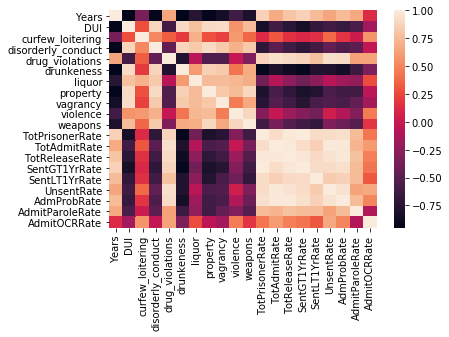

In [60]:
# Correlation matrix 
corr_subset = clean_df[['Years','DUI','curfew_loitering', 'disorderly_conduct', 
                       'drug_violations', 'drunkeness','liquor','property','vagrancy', 'violence', 'weapons',
                      'TotPrisonerRate', 'TotAdmitRate','TotReleaseRate', 'SentGT1YrRate','SentLT1YrRate', 'UnsentRate',
                       'AdmProbRate','AdmitParoleRate','AdmitOCRRate']]
correlation_matrix_clean_df = corr_subset.corr().round(2)
sns.heatmap(data=correlation_matrix_clean_df, annot=False)

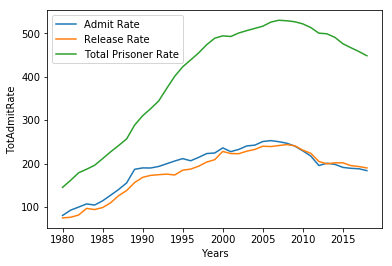

In [61]:
# Comparing Admit, Release Rate, Total Prisoner Rate

sns.lineplot(data=clean_df, x= "Years", y="TotAdmitRate", label="Admit Rate")
sns.lineplot(data=clean_df, x= "Years", y="TotReleaseRate", label="Release Rate")
sns.lineplot(data=clean_df, x= "Years", y="TotPrisonerRate", label="Total Prisoner Rate")

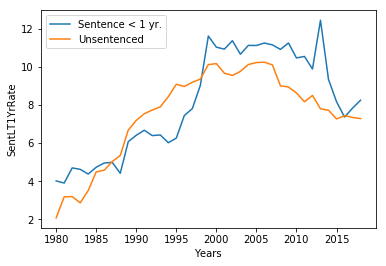

In [62]:
# Comparing number of short sentances to unsentenced prisoners.

sns.lineplot(data=clean_df, x= "Years", y="SentLT1YrRate", label="Sentence < 1 yr.")
sns.lineplot(data=clean_df, x= "Years", y="UnsentRate", label="Unsentenced")

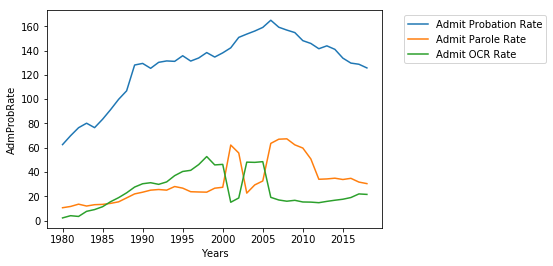

In [63]:

sns.lineplot(data=clean_df, x= "Years", y="AdmProbRate", label="Admit Probation Rate")
sns.lineplot(data=clean_df, x= "Years", y="AdmitParoleRate", label="Admit Parole Rate")
sns.lineplot(data=clean_df, x= "Years", y="AdmitOCRRate", label="Admit OCR Rate")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

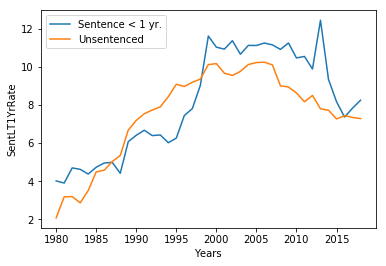

In [64]:
#Prison 

sns.lineplot(data=clean_df, x= "Years", y="SentLT1YrRate", label="Sentence < 1 yr.")
sns.lineplot(data=clean_df, x= "Years", y="UnsentRate", label="Unsentenced")

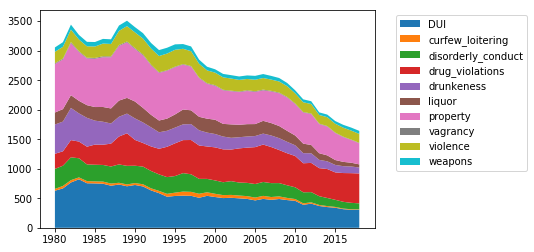

In [65]:
# Comparing relative amounts of each type of crime

y = [clean_df['DUI'], clean_df['curfew_loitering'], clean_df['disorderly_conduct'], clean_df['drug_violations'], clean_df['drunkeness'], clean_df['liquor'], 
     clean_df['property'], clean_df['vagrancy'], clean_df['violence'], clean_df['weapons']]
x = clean_df['Years']

plt.stackplot(x,y, labels = ['DUI','curfew_loitering', 'disorderly_conduct', 'drug_violations', 'drunkeness','liquor',
                             'property','vagrancy', 'violence', 'weapons'])
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

In [66]:
clean_df.describe()

Years  TotalPrisoners    TotalAdmits  TotalReleases  \
count    39.000000    3.900000e+01      39.000000      39.000000   
mean   1999.000000    1.147206e+06  542519.307692  516288.589744   
std      11.401754    4.477226e+05  172297.151819  182949.149226   
min    1980.000000    3.298210e+05  182617.000000  169826.000000   
25%    1989.500000    7.431415e+05  467463.000000  402631.000000   
50%    1999.000000    1.363686e+06  610561.000000  583013.000000   
75%    2008.500000    1.526256e+06  667407.500000  644971.000000   
max    2018.000000    1.615487e+06  754196.000000  740976.000000   

         TotalUSPop         DUI  curfew_loitering  disorderly_conduct  \
count  3.900000e+01   39.000000         39.000000           39.000000   
mean   2.775303e+08  545.730769         38.166667          244.210256   
std    3.167955e+07  144.431015         15.773835           70.138160   
min    2.272247e+08  304.800000          6.700000          100.800000   
25%    2.482210e+08  466.850000         30.850000          215.850000   
50%    2.790402e+08  521.400000         36.900000          235.800000   
75%    3.054327e+08  683.800000         48.250000          293.600000   
max    3.268382e+08  821.700000         68.700000          386.600000   

       drug_violations  drunkeness      liquor    property   vagrancy  \
count        39.000000   39.000000   39.000000   39.000000  39.000000   
mean        479.920513  267.269231  198.294872  667.674359  11.435897   
std         106.287580  120.560586   58.591530  171.271088   2.562327   
min         244.000000  100.600000   53.000000  357.300000   7.200000   
25%         424.500000  186.800000  192.700000  533.000000   9.650000   
50%         502.500000  235.100000  211.200000  589.300000  11.000000   
75%         558.000000  338.350000  232.000000  822.750000  13.600000   
max         633.400000  544.800000  286.300000  940.100000  16.100000   

         violence     weapons     SentGT1Yr     SentLT1Yr   Unsentenced  \
count   39.000000   39.000000  3.900000e+01     39.000000     39.000000   
mean   207.902564   68.989744  1.102689e+06  23125.307692  21418.128205   
std     41.278078   16.912994  4.316458e+05   9362.188347   7694.884467   
min    146.700000   43.600000  3.159640e+05   8960.000000   4719.000000   
25%    185.450000   55.300000  7.104435e+05  15410.000000  17215.500000   
50%    199.000000   67.300000  1.304081e+06  24886.000000  24148.000000   
75%    237.000000   80.300000  1.469856e+06  32376.500000  27391.500000   
max    286.000000  100.900000  1.553574e+06  39307.000000  30551.000000   

       AdmitProbation    AdmitParole       AdmitOCR  TotPrisonerRate  \
count       39.000000      39.000000      39.000000        39.000000   
mean    360212.820513   90969.871795   68794.307692       400.837761   
std     104185.707858   54404.540453   39945.490730       127.657658   
min     142122.000000   23944.000000    4873.000000       145.151901   
25%     316726.000000   56179.500000   46661.000000       299.326535   
50%     381646.000000   73685.000000   56243.000000       458.039878   
75%     447274.500000  109700.500000   89981.000000       500.511492   
max     492315.000000  204671.000000  145342.000000       530.102779   

       TotAdmitRate  TotReleaseRate  SentGT1YrRate  SentLT1YrRate  UnsentRate  \
count     39.000000       39.000000      39.000000      39.000000   39.000000   
mean     191.708894      181.360507     385.200685       8.098547    7.546028   
std       49.021108       51.617898     123.029289       2.699631    2.343083   
min       80.368457       74.739228     139.053533       3.904723    2.076799   
25%      185.179248      162.172797     286.156001       6.044677    6.934116   
50%      199.509394      193.968078     442.872655       7.827520    7.896319   
75%      228.322301      223.250745     481.451136      10.915861    9.268234   
max      252.763665      243.666788     508.968336      12.436565   10.238960   

       AdmProbRate  AdmitParo

# Models

This section is for model selection.

In [67]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [68]:
# test on crime types
clean_df_model = ols("TotPrisonerRate ~ DUI+curfew_loitering+disorderly_conduct+drug_violations+drunkeness+liquor+property+vagrancy+violence+weapons", data=clean_df).fit()
clean_df_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        TotPrisonerRate   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     88.55
Date:                Mon, 07 Jun 2021   Prob (F-statistic):           1.76e-18
Time:                        21:15:08   Log-Likelihood:                -176.00
No. Observations:                  39   AIC:                             374.0
Df Residuals:                      28   BIC:                             392.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            512.9178     94.131      5.449      0.000     320.100     705.735
DUI                    0.0662      0.160      0.414      0.682      -0.261       0.394
curfew_loitering       0.6147      0.792      0.776      0.444      -1.008       2.238
disorderly_conduct     0.8463      0.350      2.417      0.022       0.129       1.563
drug_violations        0.0981      0.151      0.652      0.520      -0.210       0.407
drunkeness            -0.8580      0.236     -3.641      0.001      -1.341      -0.375
liquor                -0.1588      0.382     -0.416      0.680      -0.940       0.623
property              -0.3526      0.144     -2.450      0.021      -0.647      -0.058
vagrancy               2.6484      5.171      0.512      0.613      -7.943      13.240
violence               1.4168      0.486      2.916      0.007       0.421       2.412
weapons               -3.6821      1.276     -2.886      0.007      -6.296      -1.068
==============================================================================
Omnibus:                        1.358   Durbin-Watson:                   0.760
Prob(Omnibus):                  0.507   Jarque-Bera (JB):                0.992
Skew:                          -0.035   Prob(JB):                        0.609
Kurtosis:                       2.222   Cond. No.                     2.51e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [69]:
# test on crime types
clean_df_model2 = ols("TotPrisonerRate ~ DUI+curfew_loitering+disorderly_conduct+drug_violations+drunkeness+liquor+property+vagrancy+violence+weapons+TotAdmitRate+TotReleaseRate+SentGT1YrRate+SentLT1YrRate+UnsentRate+AdmProbRate+AdmitParoleRate+AdmitOCRRate", data=clean_df).fit()
clean_df_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        TotPrisonerRate   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.326e+05
Date:                Mon, 07 Jun 2021   Prob (F-statistic):           7.57e-51
Time:                        21:15:08   Log-Likelihood:                 1.9277
No. Observations:                  39   AIC:                             34.14
Df Residuals:                      20   BIC:                             65.75
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              2.5276      2.537      0.996      0.331      -2.764       7.820
DUI                    0.0015      0.002      0.731      0.473      -0.003       0.006
curfew_loitering      -0.0344      0.020     -1.690      0.107      -0.077       0.008
disorderly_conduct     0.0128      0.006      2.005      0.059      -0.001       0.026
drug_violations       -0.0029      0.003     -1.122      0.275      -0.008       0.003
drunkeness             0.0014      0.004      0.380      0.708      -0.006       0.009
liquor                 0.0044      0.006      0.738      0.469      -0.008       0.017
property              -0.0029      0.003     -1.101      0.284      -0.009       0.003
vagrancy              -0.0412      0.084     -0.489      0.630      -0.217       0.134
violence              -0.0087      0.009     -0.958      0.350      -0.028       0.010
weapons               -0.0312      0.024     -1.307      0.206      -0.081       0.019
TotAdmitRate          -0.0010      0.031     -0.030      0.976      -0.067       0.065
TotReleaseRate         0.0058      0.022      0.260      0.797      -0.041       0.053
SentGT1YrRate          1.0016      0.007    148.394      0.000       0.988       1.016
SentLT1YrRate          0.4734      0.109      4.327      0.000       0.245       0.702
UnsentRate             1.4404      0.243      5.932      0.000       0.934       1.947
AdmProbRate           -0.0084      0.025     -0.330      0.745      -0.061       0.045
AdmitParoleRate        0.0305      0.035      0.877      0.391      -0.042       0.103
AdmitOCRRate           0.0372      0.041      0.903      0.377      -0.049       0.123
==============================================================================
Omnibus:                        1.382   Durbin-Watson:                   2.242
Prob(Omnibus):                  0.501   Jarque-Bera (JB):                0.640
Skew:                          -0.277   Prob(JB):                        0.726
Kurtosis:                       3.294   Cond. No.                     5.95e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.95e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [70]:
# test on crime types
clean_df_model3 = ols("TotPrisonerRate ~ disorderly_conduct+drunkeness+property+violence+weapons+TotAdmitRate+TotReleaseRate+AdmProbRate+AdmitParoleRate+AdmitOCRRate", data=clean_df).fit()
clean_df_model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        TotPrisonerRate   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     216.7
Date:                Mon, 07 Jun 2021   Prob (F-statistic):           8.84e-24
Time:                        21:15:08   Log-Likelihood:                -158.91
No. Observations:                  39   AIC:                             339.8
Df Residuals:                      28   BIC:                             358.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            303.6674     60.917      4.985      0.000     178.884     428.451
disorderly_conduct     0.4160      0.180      2.314      0.028       0.048       0.784
drunkeness            -0.3028      0.125     -2.424      0.022      -0.559      -0.047
property              -0.2741      0.075     -3.659      0.001      -0.427      -0.121
violence               0.9013      0.308      2.926      0.007       0.270       1.532
weapons               -2.5430      0.755     -3.370      0.002      -4.089      -0.997
TotAdmitRate          -0.5788      1.302     -0.444      0.660      -3.246       2.089
TotReleaseRate         0.4287      0.762      0.563      0.578      -1.132       1.989
AdmProbRate            1.7412      1.195      1.458      0.156      -0.706       4.188
AdmitParoleRate        0.9802      1.276      0.768      0.449      -1.633       3.594
AdmitOCRRate           1.1366      1.485      0.765      0.451      -1.906       4.179
==============================================================================
Omnibus:                        2.911   Durbin-Watson:                   0.771
Prob(Omnibus):                  0.233   Jarque-Bera (JB):                1.464
Skew:                          -0.057   Prob(JB):                        0.481
Kurtosis:                       2.058   Cond. No.                     1.95e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.95e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [71]:
# test on crime types
clean_df_model4 = ols("TotPrisonerRate ~ disorderly_conduct+drunkeness+property+violence+weapons", data=clean_df).fit()
clean_df_model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        TotPrisonerRate   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                     191.4
Date:                Mon, 07 Jun 2021   Prob (F-statistic):           2.27e-23
Time:                        21:15:08   Log-Likelihood:                -177.63
No. Observations:                  39   AIC:                             367.3
Df Residuals:                      33   BIC:                             377.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            582.2140     22.323     26.081      0.000     536.797     627.631
disorderly_conduct     1.1418      0.195      5.868      0.000       0.746       1.538
drunkeness            -0.9271      0.115     -8.040      0.000      -1.162      -0.693
property              -0.4047      0.089     -4.570      0.000      -0.585      -0.224
violence               1.5735      0.322      4.888      0.000       0.919       2.228
weapons               -3.9044      0.891     -4.381      0.000      -5.718      -2.091
==============================================================================
Omnibus:                        0.927   Durbin-Watson:                   0.831
Prob(Omnibus):                  0.629   Jarque-Bera (JB):                0.661
Skew:                          -0.316   Prob(JB):                        0.719
Kurtosis:                       2.913   Cond. No.                     4.56e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.56e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""